<a href="https://colab.research.google.com/github/endophenotype/AI/blob/Regression/%D0%9F%D1%80%D0%B5%D0%B4%D1%81%D0%BA%D0%B0%D0%B7%D0%B0%D0%BD%D0%B8%D0%B5_%D1%86%D0%B5%D0%BD_%D0%B0%D0%B2%D1%82%D0%BE_%D0%BF%D1%80%D0%B8_%D0%BF%D0%BE%D0%BC%D0%BE%D1%89%D0%B8_%D0%BC%D0%B5%D1%82%D0%BE%D0%B4%D0%BE%D0%B2_%D0%BC%D0%B0%D1%88%D0%B8%D0%BD%D0%BD%D0%BE%D0%B3%D0%BE_%D0%BE%D0%B1%D1%83%D1%87%D0%B5%D0%BD%D0%B8%D1%8F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import seaborn as sns
import matplotlib

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
#import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder
#from category_encoders.target_encoder import TargetEncoder
from sklearn.preprocessing import StandardScaler, LabelEncoder

from sklearn.ensemble import RandomForestRegressor
from sklearn.isotonic import IsotonicRegression
from sklearn.linear_model import LassoCV, RidgeCV, ElasticNetCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, Normalizer, LabelEncoder
from sklearn.ensemble import GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split

import warnings
%matplotlib inline
warnings.filterwarnings("ignore")

from google.colab import drive

from joblib import dump, load

drive.mount("/drive")

Mounted at /drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_csv("/content/drive/MyDrive/cars.csv",encoding="1251")
df

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen;;;;;;;;
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480.0,test,NaN,1993.0,manuell,0.0,golf,150000.0,0.0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0.0,70435.0,2016-04-07 03:16:57;;;;;;;;
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300.0,test,coupe,2011.0,manuell,190.0,NaN,125000.0,5.0,diesel,audi,ja,2016-03-24 00:00:00,0.0,66954.0,2016-04-07 01:46:50;;;;;;;;
2,"2016-03-14 12:52:21,Jeep_Grand_Cherokee_""Overl...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2016-03-17 16:54:04,GOLF_4_1_4__3TЬRER,privat,Angebot,1500.0,test,kleinwagen,2001.0,manuell,75.0,golf,150000.0,6.0,benzin,volkswagen,nein,2016-03-17 00:00:00,0.0,91074.0,2016-03-17 17:40:17;;;;;;;;
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600.0,test,kleinwagen,2008.0,manuell,69.0,fabia,90000.0,7.0,diesel,skoda,nein,2016-03-31 00:00:00,0.0,60437.0,2016-04-06 10:17:21;;;;;;;;
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371819,2016-03-14 17:48:27,Suche_t4___vito_ab_6_sitze,privat,Angebot,2200.0,test,NaN,2005.0,NaN,0.0,NaN,20000.0,1.0,NaN,sonstige_autos,NaN,2016-03-14 00:00:00,0.0,39576.0,2016-04-06 00:46:52;;;;;;;;
371820,2016-03-05 19:56:21,Smart_smart_leistungssteigerung_100ps,privat,Angebot,1199.0,test,cabrio,2000.0,automatik,101.0,fortwo,125000.0,3.0,benzin,smart,nein,2016-03-05 00:00:00,0.0,26135.0,2016-03-11 18:17:12;;;;;;;;
371821,2016-03-19 18:57:12,Volkswagen_Multivan_T4_TDI_7DC_UY2,privat,Angebot,9200.0,test,bus,1996.0,manuell,102.0,transporter,150000.0,3.0,diesel,volkswagen,nein,2016-03-19 00:00:00,0.0,87439.0,2016-04-07 07:15:26;;;;;;;;
371822,2016-03-20 19:41:08,VW_Golf_Kombi_1_9l_TDI,privat,Angebot,3400.0,test,kombi,2002.0,manuell,100.0,golf,150000.0,6.0,diesel,volkswagen,NaN,2016-03-20 00:00:00,0.0,40764.0,2016-03-24 12:45:21;;;;;;;;


In [ ]:
df[df['dateCrawled'].str.contains(",")]=df[df['dateCrawled'].str.contains(",")]["dateCrawled"].str.split(',',expand=True)
df

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen;;;;;;;;
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480.0,test,NaN,1993.0,manuell,0.0,golf,150000.0,0.0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0.0,70435.0,2016-04-07 03:16:57;;;;;;;;
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300.0,test,coupe,2011.0,manuell,190.0,NaN,125000.0,5.0,diesel,audi,ja,2016-03-24 00:00:00,0.0,66954.0,2016-04-07 01:46:50;;;;;;;;
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46;;;;;;;;
3,2016-03-17 16:54:04,GOLF_4_1_4__3TЬRER,privat,Angebot,1500.0,test,kleinwagen,2001.0,manuell,75.0,golf,150000.0,6.0,benzin,volkswagen,nein,2016-03-17 00:00:00,0.0,91074.0,2016-03-17 17:40:17;;;;;;;;
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600.0,test,kleinwagen,2008.0,manuell,69.0,fabia,90000.0,7.0,diesel,skoda,nein,2016-03-31 00:00:00,0.0,60437.0,2016-04-06 10:17:21;;;;;;;;
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371819,2016-03-14 17:48:27,Suche_t4___vito_ab_6_sitze,privat,Angebot,2200.0,test,NaN,2005.0,NaN,0.0,NaN,20000.0,1.0,NaN,sonstige_autos,NaN,2016-03-14 00:00:00,0.0,39576.0,2016-04-06 00:46:52;;;;;;;;
371820,2016-03-05 19:56:21,Smart_smart_leistungssteigerung_100ps,privat,Angebot,1199.0,test,cabrio,2000.0,automatik,101.0,fortwo,125000.0,3.0,benzin,smart,nein,2016-03-05 00:00:00,0.0,26135.0,2016-03-11 18:17:12;;;;;;;;
371821,2016-03-19 18:57:12,Volkswagen_Multivan_T4_TDI_7DC_UY2,privat,Angebot,9200.0,test,bus,1996.0,manuell,102.0,transporter,150000.0,3.0,diesel,volkswagen,nein,2016-03-19 00:00:00,0.0,87439.0,2016-04-07 07:15:26;;;;;;;;
371822,2016-03-20 19:41:08,VW_Golf_Kombi_1_9l_TDI,privat,Angebot,3400.0,test,kombi,2002.0,manuell,100.0,golf,150000.0,6.0,diesel,volkswagen,NaN,2016-03-20 00:00:00,0.0,40764.0,2016-03-24 12:45:21;;;;;;;;


In [ ]:
df=df.rename(columns={"dateCrawled":"Получено","name":"Наименование","seller":"Продавец",
 'offerType':"Тип запроса",
 'price':"Цена",
 'abtest':"Тестирование",
 'vehicleType':"Тип кузова",
 'yearOfRegistration':"Год регистрации",
 'gearbox':"КПП",
 'powerPS':"Мощность",
 'model':"Модель",
 'kilometer':"Пробег",
 'monthOfRegistration':"Месяц регистрации",
 'fuelType':"Тип двигателя",
 'brand':"Марка",
 'notRepairedDamage':"Требуется ремонт",
 'dateCreated':"Дата создания",
 'nrOfPictures':"Фотографии",
 'postalCode':"Индекс",
 'lastSeen;;;;;;;;':"Последняя активность"})

In [ ]:
df=df.drop(columns=["Получено","Наименование","Тип запроса","Тестирование","Месяц регистрации","Дата создания","Индекс","Последняя активность"])
df

,Продавец,Цена,Тип кузова,Год регистрации,КПП,Мощность,Модель,Пробег,Тип двигателя,Марка,Требуется ремонт,Фотографии
0,privat,480.0,NaN,1993.0,manuell,0.0,golf,150000.0,benzin,volkswagen,NaN,0.0
1,privat,18300.0,coupe,2011.0,manuell,190.0,NaN,125000.0,diesel,audi,ja,0.0
2,privat,9800,suv,2004,automatik,163,grand,125000,diesel,jeep,,0
3,privat,1500.0,kleinwagen,2001.0,manuell,75.0,golf,150000.0,benzin,volkswagen,nein,0.0
4,privat,3600.0,kleinwagen,2008.0,manuell,69.0,fabia,90000.0,diesel,skoda,nein,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
371819,privat,2200.0,NaN,2005.0,NaN,0.0,NaN,20000.0,NaN,sonstige_autos,NaN,0.0
371820,privat,1199.0,cabrio,2000.0,automatik,101.0,fortwo,125000.0,benzin,smart,nein,0.0
371821,privat,9200.0,bus,1996.0,manuell,102.0,transporter,150000.0,diesel,volkswagen,nein,0.0
371822,privat,3400.0,kombi,2002.0,manuell,100.0,golf,150000.0,diesel,volkswagen,NaN,0.0


In [ ]:
df=df.replace({"Продавец":{'privat':"Часное лицо", 'gewerblich':"Организация"}})
df

,Продавец,Цена,Тип кузова,Год регистрации,КПП,Мощность,Модель,Пробег,Тип двигателя,Марка,Требуется ремонт,Фотографии
0,Часное лицо,480.0,NaN,1993.0,manuell,0.0,golf,150000.0,benzin,volkswagen,NaN,0.0
1,Часное лицо,18300.0,coupe,2011.0,manuell,190.0,NaN,125000.0,diesel,audi,ja,0.0
2,Часное лицо,9800,suv,2004,automatik,163,grand,125000,diesel,jeep,,0
3,Часное лицо,1500.0,kleinwagen,2001.0,manuell,75.0,golf,150000.0,benzin,volkswagen,nein,0.0
4,Часное лицо,3600.0,kleinwagen,2008.0,manuell,69.0,fabia,90000.0,diesel,skoda,nein,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
371819,Часное лицо,2200.0,NaN,2005.0,NaN,0.0,NaN,20000.0,NaN,sonstige_autos,NaN,0.0
371820,Часное лицо,1199.0,cabrio,2000.0,automatik,101.0,fortwo,125000.0,benzin,smart,nein,0.0
371821,Часное лицо,9200.0,bus,1996.0,manuell,102.0,transporter,150000.0,diesel,volkswagen,nein,0.0
371822,Часное лицо,3400.0,kombi,2002.0,manuell,100.0,golf,150000.0,diesel,volkswagen,NaN,0.0


In [ ]:
df=df.replace({"КПП":{'manuell':"МКПП", 'automatik':"АКПП","":None,float('nan'):None}})
df

,Продавец,Цена,Тип кузова,Год регистрации,КПП,Мощность,Модель,Пробег,Тип двигателя,Марка,Требуется ремонт,Фотографии
0,Часное лицо,480.0,NaN,1993.0,МКПП,0.0,golf,150000.0,benzin,volkswagen,NaN,0.0
1,Часное лицо,18300.0,coupe,2011.0,МКПП,190.0,NaN,125000.0,diesel,audi,ja,0.0
2,Часное лицо,9800,suv,2004,АКПП,163,grand,125000,diesel,jeep,,0
3,Часное лицо,1500.0,kleinwagen,2001.0,МКПП,75.0,golf,150000.0,benzin,volkswagen,nein,0.0
4,Часное лицо,3600.0,kleinwagen,2008.0,МКПП,69.0,fabia,90000.0,diesel,skoda,nein,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
371819,Часное лицо,2200.0,NaN,2005.0,None,0.0,NaN,20000.0,NaN,sonstige_autos,NaN,0.0
371820,Часное лицо,1199.0,cabrio,2000.0,АКПП,101.0,fortwo,125000.0,benzin,smart,nein,0.0
371821,Часное лицо,9200.0,bus,1996.0,МКПП,102.0,transporter,150000.0,diesel,volkswagen,nein,0.0
371822,Часное лицо,3400.0,kombi,2002.0,МКПП,100.0,golf,150000.0,diesel,volkswagen,NaN,0.0


In [ ]:
df=df.replace({"Требуется ремонт":{'ja':"Да", 'nein':"Нет","":None,float('nan'):None}})
df

,Продавец,Цена,Тип кузова,Год регистрации,КПП,Мощность,Модель,Пробег,Тип двигателя,Марка,Требуется ремонт,Фотографии
0,Часное лицо,480.0,NaN,1993.0,МКПП,0.0,golf,150000.0,benzin,volkswagen,None,0.0
1,Часное лицо,18300.0,coupe,2011.0,МКПП,190.0,NaN,125000.0,diesel,audi,Да,0.0
2,Часное лицо,9800,suv,2004,АКПП,163,grand,125000,diesel,jeep,None,0
3,Часное лицо,1500.0,kleinwagen,2001.0,МКПП,75.0,golf,150000.0,benzin,volkswagen,Нет,0.0
4,Часное лицо,3600.0,kleinwagen,2008.0,МКПП,69.0,fabia,90000.0,diesel,skoda,Нет,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
371819,Часное лицо,2200.0,NaN,2005.0,None,0.0,NaN,20000.0,NaN,sonstige_autos,None,0.0
371820,Часное лицо,1199.0,cabrio,2000.0,АКПП,101.0,fortwo,125000.0,benzin,smart,Нет,0.0
371821,Часное лицо,9200.0,bus,1996.0,МКПП,102.0,transporter,150000.0,diesel,volkswagen,Нет,0.0
371822,Часное лицо,3400.0,kombi,2002.0,МКПП,100.0,golf,150000.0,diesel,volkswagen,None,0.0


In [ ]:
df=df.replace({"Тип двигателя":{'benzin':"Бензин", 'diesel':"Дизель","lpg":"Водород","andere":"Другое",'hybrid':"Гибрид","cng":"Газ","elektro":"Электро","":None,float('nan'):None}})
df

,Продавец,Цена,Тип кузова,Год регистрации,КПП,Мощность,Модель,Пробег,Тип двигателя,Марка,Требуется ремонт,Фотографии
0,Часное лицо,480.0,NaN,1993.0,МКПП,0.0,golf,150000.0,Бензин,volkswagen,None,0.0
1,Часное лицо,18300.0,coupe,2011.0,МКПП,190.0,NaN,125000.0,Дизель,audi,Да,0.0
2,Часное лицо,9800,suv,2004,АКПП,163,grand,125000,Дизель,jeep,None,0
3,Часное лицо,1500.0,kleinwagen,2001.0,МКПП,75.0,golf,150000.0,Бензин,volkswagen,Нет,0.0
4,Часное лицо,3600.0,kleinwagen,2008.0,МКПП,69.0,fabia,90000.0,Дизель,skoda,Нет,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
371819,Часное лицо,2200.0,NaN,2005.0,None,0.0,NaN,20000.0,None,sonstige_autos,None,0.0
371820,Часное лицо,1199.0,cabrio,2000.0,АКПП,101.0,fortwo,125000.0,Бензин,smart,Нет,0.0
371821,Часное лицо,9200.0,bus,1996.0,МКПП,102.0,transporter,150000.0,Дизель,volkswagen,Нет,0.0
371822,Часное лицо,3400.0,kombi,2002.0,МКПП,100.0,golf,150000.0,Дизель,volkswagen,None,0.0


In [ ]:
df["Тип кузова"].unique()

array([nan, 'coupe', 'suv', 'kleinwagen', 'limousine', 'cabrio', 'bus',
       'kombi', 'andere', '', None], dtype=object)

In [ ]:
df[df["Тип кузова"] == "bus"]

,Продавец,Цена,Тип кузова,Год регистрации,КПП,Мощность,Модель,Пробег,Тип двигателя,Марка,Требуется ремонт,Фотографии
8,Часное лицо,14500.0,bus,2014.0,МКПП,125.0,c_max,30000.0,Бензин,ford,None,0.0
18,Часное лицо,7550.0,bus,2007.0,МКПП,136.0,c_max,150000.0,Дизель,ford,Нет,0.0
19,Часное лицо,1850.0,bus,2004.0,МКПП,102.0,a_klasse,150000.0,Бензин,mercedes_benz,Нет,0.0
28,Часное лицо,1990.0,bus,1981.0,МКПП,50.0,transporter,5000.0,Бензин,volkswagen,Нет,0.0
39,Часное лицо,1500.0,bus,1984.0,МКПП,70.0,andere,150000.0,Дизель,mercedes_benz,Нет,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
371761,Часное лицо,1650.0,bus,2002.0,МКПП,66.0,vito,150000.0,Дизель,mercedes_benz,Нет,0.0
371785,Часное лицо,7900.0,bus,2007.0,МКПП,0.0,b_klasse,125000.0,Бензин,mercedes_benz,Нет,0.0
371797,Часное лицо,3900.0,bus,2003.0,АКПП,174.0,voyager,150000.0,Бензин,chrysler,Нет,0.0
371817,Часное лицо,1150.0,bus,2000.0,МКПП,0.0,zafira,150000.0,Бензин,opel,Нет,0.0


In [ ]:
df=df.replace({"Тип кузова":{"coupe":"Купе","suv":"Кроссовер","kleinwagen":"Малолитражка","limousine":"Седан","cabrio":"Кабриолет","bus":"Минивен","kombi":"Универсал","andere":"Другой","":None,float('nan'):None}})
df

,Продавец,Цена,Тип кузова,Год регистрации,КПП,Мощность,Модель,Пробег,Тип двигателя,Марка,Требуется ремонт,Фотографии
0,Часное лицо,480.0,None,1993.0,МКПП,0.0,golf,150000.0,Бензин,volkswagen,None,0.0
1,Часное лицо,18300.0,Купе,2011.0,МКПП,190.0,NaN,125000.0,Дизель,audi,Да,0.0
2,Часное лицо,9800,Кроссовер,2004,АКПП,163,grand,125000,Дизель,jeep,None,0
3,Часное лицо,1500.0,Малолитражка,2001.0,МКПП,75.0,golf,150000.0,Бензин,volkswagen,Нет,0.0
4,Часное лицо,3600.0,Малолитражка,2008.0,МКПП,69.0,fabia,90000.0,Дизель,skoda,Нет,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
371819,Часное лицо,2200.0,None,2005.0,None,0.0,NaN,20000.0,None,sonstige_autos,None,0.0
371820,Часное лицо,1199.0,Кабриолет,2000.0,АКПП,101.0,fortwo,125000.0,Бензин,smart,Нет,0.0
371821,Часное лицо,9200.0,Минивен,1996.0,МКПП,102.0,transporter,150000.0,Дизель,volkswagen,Нет,0.0
371822,Часное лицо,3400.0,Универсал,2002.0,МКПП,100.0,golf,150000.0,Дизель,volkswagen,None,0.0


In [ ]:
df["Тип кузова"].unique()

array([None, 'Купе', 'Кроссовер', 'Малолитражка', 'Седан', 'Кабриолет',
       'Минивен', 'Универсал', 'Другой'], dtype=object)

In [ ]:
df

,Продавец,Цена,Тип кузова,Год регистрации,КПП,Мощность,Модель,Пробег,Тип двигателя,Марка,Требуется ремонт,Фотографии
0,Часное лицо,480.0,None,1993.0,МКПП,0.0,golf,150000.0,Бензин,volkswagen,None,0.0
1,Часное лицо,18300.0,Купе,2011.0,МКПП,190.0,NaN,125000.0,Дизель,audi,Да,0.0
2,Часное лицо,9800,Кроссовер,2004,АКПП,163,grand,125000,Дизель,jeep,None,0
3,Часное лицо,1500.0,Малолитражка,2001.0,МКПП,75.0,golf,150000.0,Бензин,volkswagen,Нет,0.0
4,Часное лицо,3600.0,Малолитражка,2008.0,МКПП,69.0,fabia,90000.0,Дизель,skoda,Нет,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
371819,Часное лицо,2200.0,None,2005.0,None,0.0,NaN,20000.0,None,sonstige_autos,None,0.0
371820,Часное лицо,1199.0,Кабриолет,2000.0,АКПП,101.0,fortwo,125000.0,Бензин,smart,Нет,0.0
371821,Часное лицо,9200.0,Минивен,1996.0,МКПП,102.0,transporter,150000.0,Дизель,volkswagen,Нет,0.0
371822,Часное лицо,3400.0,Универсал,2002.0,МКПП,100.0,golf,150000.0,Дизель,volkswagen,None,0.0


In [ ]:
df["Марка"].unique()

array(['volkswagen', 'audi', 'jeep', 'skoda', 'bmw', 'peugeot', 'ford',
       'mazda', 'nissan', 'renault', 'mercedes_benz', 'opel', 'seat',
       'citroen', 'honda', 'fiat', 'mini', 'smart', 'hyundai',
       'sonstige_autos', 'alfa_romeo', 'subaru', 'volvo', 'mitsubishi',
       'kia', 'suzuki', 'lancia', 'porsche', 'toyota', 'chevrolet',
       'dacia', 'daihatsu', 'trabant', 'saab', 'chrysler', 'jaguar',
       'daewoo', 'rover', 'land_rover', 'lada', None], dtype=object)

In [ ]:
df=df.replace({"Марка":{"":None,float('nan'):None,
                             'volkswagen':"Volkswagen", 'audi':'Audi', 'jeep':'Jeep', 'skoda':"Skoda", 'bmw':"BMW", 'peugeot':"Peugeot", 'ford':'Ford',
       'mazda':"Mazda", 'nissan':"Nissan", 'renault':"Renault", 'mercedes_benz':"Mercedes-Benz", 'opel':"Opel", 'seat':"Seat",
       'citroen':"Citroen", 'honda':"Honda", 'fiat':"Fiat", 'mini':"Mini", 'smart':"Smart", 'hyundai':"Hyundai",
       'sonstige_autos':"Sonstige Autos", 'alfa_romeo':"Alfa Romeo", 'subaru':"Subaru", 'volvo':"Volvo", 'mitsubishi':"Mitsubishi",
       'kia':"Kia", 'suzuki':"Suzuki", 'lancia':"Lancia", 'porsche':'Porsche', 'toyota':"Toyota", 'chevrolet':"Chevrolet",
       'dacia':"Dacia", 'daihatsu':"Daihatsu", 'trabant':"Trabant", 'saab':"Saab", 'chrysler':"Chrysler", 'jaguar':"Jaguar",
       'daewoo':"Daewoo", 'rover':"Land Rover", 'land_rover':"Land Rover", 'lada':"Lada"}})
df

,Продавец,Цена,Тип кузова,Год регистрации,КПП,Мощность,Модель,Пробег,Тип двигателя,Марка,Требуется ремонт,Фотографии
0,Часное лицо,480.0,None,1993.0,МКПП,0.0,golf,150000.0,Бензин,Volkswagen,None,0.0
1,Часное лицо,18300.0,Купе,2011.0,МКПП,190.0,NaN,125000.0,Дизель,Audi,Да,0.0
2,Часное лицо,9800,Кроссовер,2004,АКПП,163,grand,125000,Дизель,Jeep,None,0
3,Часное лицо,1500.0,Малолитражка,2001.0,МКПП,75.0,golf,150000.0,Бензин,Volkswagen,Нет,0.0
4,Часное лицо,3600.0,Малолитражка,2008.0,МКПП,69.0,fabia,90000.0,Дизель,Skoda,Нет,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
371819,Часное лицо,2200.0,None,2005.0,None,0.0,NaN,20000.0,None,Sonstige Autos,None,0.0
371820,Часное лицо,1199.0,Кабриолет,2000.0,АКПП,101.0,fortwo,125000.0,Бензин,Smart,Нет,0.0
371821,Часное лицо,9200.0,Минивен,1996.0,МКПП,102.0,transporter,150000.0,Дизель,Volkswagen,Нет,0.0
371822,Часное лицо,3400.0,Универсал,2002.0,МКПП,100.0,golf,150000.0,Дизель,Volkswagen,None,0.0


In [ ]:
df["Марка"].unique()

array(['Volkswagen', 'Audi', 'Jeep', 'Skoda', 'BMW', 'Peugeot', 'Ford',
       'Mazda', 'Nissan', 'Renault', 'Mercedes-Benz', 'Opel', 'Seat',
       'Citroen', 'Honda', 'Fiat', 'Mini', 'Smart', 'Hyundai',
       'Sonstige Autos', 'Alfa Romeo', 'Subaru', 'Volvo', 'Mitsubishi',
       'Kia', 'Suzuki', 'Lancia', 'Porsche', 'Toyota', 'Chevrolet',
       'Dacia', 'Daihatsu', 'Trabant', 'Saab', 'Chrysler', 'Jaguar',
       'Daewoo', 'Land Rover', 'Lada', None], dtype=object)

In [ ]:
df["Модель"].unique()

array(['golf', nan, 'grand', 'fabia', '3er', '2_reihe', 'andere', 'c_max',
       '3_reihe', 'passat', 'navara', 'ka', 'polo', 'twingo', 'a_klasse',
       'scirocco', '5er', 'meriva', 'arosa', 'c4', 'civic', 'transporter',
       'punto', 'e_klasse', 'clio', 'kadett', 'kangoo', 'corsa', 'one',
       'fortwo', '1er', 'b_klasse', 'signum', 'astra', 'a8', 'jetta',
       'fiesta', 'c_klasse', 'micra', 'vito', 'sprinter', '156', 'escort',
       'forester', 'xc_reihe', 'scenic', 'a4', 'a1', 'insignia', 'combo',
       'focus', 'tt', 'a6', 'jazz', 'omega', 'slk', '7er', '80', '147',
       'glk', '100', 'z_reihe', 'sportage', 'sorento', 'v40', 'ibiza',
       'mustang', 'eos', 'touran', 'getz', 'a3', 'almera', 'megane',
       'lupo', 'r19', 'zafira', 'caddy', 'mondeo', 'cordoba', 'colt',
       'impreza', 'vectra', 'berlingo', 'm_klasse', 'tiguan', 'i_reihe',
       'espace', 'sharan', '6_reihe', 'panda', 'up', 'seicento', 'ceed',
       '5_reihe', 'yeti', 'octavia', 'mii', 'rx_reihe', '

In [ ]:
df[["Марка","Модель"]].drop_duplicates().sort_values("Марка")

,Марка,Модель
1084,Alfa Romeo,andere
82,Alfa Romeo,156
10666,Alfa Romeo,145
427,Alfa Romeo,NaN
437,Alfa Romeo,spider
...,...,...
171,Volvo,v40
5863,Volvo,850
87,Volvo,xc_reihe
10524,Volvo,v60


In [ ]:
df=df.replace({"Модель":{"":None,float('nan'):None,
                        'golf':'Golf',
                        'grand':'Grand Cherokee',
                        'fabia':'Fabia',
                        '3er':'3er',
                        '2_reihe':'2 серия',
                        'andere':'Другое',
                        'c_max':'C-Max',
                        '3_reihe':'3 серия',
                        'passat':'Passat',
                        'navara':'Navara',
                        'ka':'Ka',
                        'polo':'Polo',
                        'twingo':'Twingo',
                        'a_klasse':'A класс',
                        'scirocco':'Scirocco',
                        '5er':'5er',
                        'meriva':'Meriva',
                        'arosa':'Arosa',
                        'c4':'C4',
                        'civic':'Civic',
                        'transporter':'Transporter',
                        'punto':'Punto',
                        'e_klasse':'E класс',
                        'clio':'Clio',
                        'kadett':'Kadett',
                        'kangoo':'Kangoo',
                        'corsa':'Corsa',
                        'one':'One',
                        'fortwo':'Fortwo',
                        '1er':'1er',
                        'b_klasse':'B класс',
                        'signum':'Signum',
                        'astra':'Astra',
                        'a8':'A8',
                        'jetta':'Jetta',
                        'fiesta':'Fiesta',
                        'c_klasse':'C класс',
                        'micra':'Micra',
                        'vito':'Vito',
                        'sprinter':'Sprinter',
                        '156':'156',
                        'escort':'Escort',
                        'forester':'Forester',
                        'xc_reihe':'XC серия',
                        'scenic':'Scenic',
                        'a4':'A4',
                        'a1':'A1',
                        'insignia':'Insignia',
                        'combo':'Combo',
                        'focus':'Focus',
                        'tt':'TT',
                        'a6':'A6',
                        'jazz':'Jazz',
                        'omega':'Omega',
                        'slk':'Slk',
                        '7er':'7er',
                        '80':'80',
                        '147':'147',
                        'glk':'GLK',
                        '100':'100',
                        'z_reihe':'Z серия',
                        'sportage':'Sportage',
                        'sorento':'Sorento',
                        'v40':'V40',
                        'ibiza':'Ibiza',
                        'mustang':'Mustang',
                        'eos':'Eos',
                        'touran':'Touran',
                        'getz':'Getz',
                        'a3':'A3',
                        'almera':'Almera',
                        'megane':'Megane',
                        'lupo':'Lupo',
                        'r19':'r19',
                        'zafira':'Zafira',
                        'caddy':'Caddy',
                        'mondeo':'Mondeo',
                        'cordoba':'Cordoba',
                        'colt':'Colt',
                        'impreza':'Impreza',
                        'vectra':'Vectra',
                        'berlingo':'Berlingo',
                        'm_klasse':'M класс',
                        'tiguan':'Tiguan',
                        'i_reihe':'I серия',
                        'espace':'Espace',
                        'sharan':'Sharan',
                        '6_reihe':'6 серия',
                        'panda':'Panda',
                        'up':'Up!',
                        'seicento':'Seicento',
                        'ceed':'Ceed',
                        '5_reihe':'5 Серия',
                        'yeti':'Yeti',
                        'octavia':'Octavia',
                        'mii':'Mii',
                        'rx_reihe':'RX серия',
                        '6er':'6er',
                        'modus':'Modus',
                        'fox':'Fox',
                        'matiz':'Matiz',
                        'beetle':'Beetle',
                        'c1':'C1',
                        'rio':'Rio',
                        'touareg':'Touareg',
                        'logan':'Logan',
                        'spider':'Spider',
                        'cuore':'Cuore',
                        's_max':'S-Max',
                        'a2':'A2',
                        'x_reihe':'X серия',
                        'a5':'A5',
                        'galaxy':'Galaxy',
                        'c3':'C3',
                        'viano':'Viano',
                        's_klasse':'S класс',
                        '1_reihe':'1 серия',
                        'avensis':'Avensis',
                        'sl':'SL',
                        'roomster':'Roomster',
                        'q5':'Q5',
                        'kaefer':'Kaefer',
                        'santa':'Santa',
                        'cooper':'Cooper',
                        'leon':'Leon',
                        '4_reihe':'4 серия',
                        '500':'500',
                        'laguna':'Laguna',
                        'ptcruiser':'Ptcruiser',
                        'clk':'CLK',
                        'primera':'Primera',
                        'exeo':'Exeo',
                        '159':'159',
                        'transit':'Transit',
                        'juke':'Juke',
                        'qashqai':'Qashqai',
                        'carisma':'Carisma',
                        'accord':'Accord',
                        'corolla':'Corolla',
                        'lanos':'Lanos',
                        'phaeton':'Phaeton',
                        'boxster':'Boxster',
                        'verso':'Verso',
                        'swift':'Swift',
                        'rav':'RAV4',
                        'kuga':'Kuga',
                        'picanto':'Picanto',
                        'kalos':'Kalos',
                        'superb':'Superb',
                        'stilo':'Stilo',
                        'alhambra':'Alhambra',
                        '911':'911',
                        'mx_reihe':'MX серия',
                        'm_reihe':'M серия',
                        'roadster':'Roadster',
                        'ypsilon':'Ypsilon',
                        'cayenne':'Cayenne',
                        'galant':'Galant',
                        'justy':'Justy',
                        '90':'90',
                        'sirion':'Sirion',
                        'crossfire':'Crossfire',
                        'agila':'Agila',
                        'duster':'Duster',
                        'cr_reihe':'CR серия',
                        'v50':'V50',
                        'discovery':'Discovery',
                        'c_reihe':'C серия',
                        'v_klasse':'V класс',
                        'yaris':'Yaris',
                        'c5':'C5',
                        'aygo':'Aygo',
                        'cc':'CC',
                        'carnival':'Carnival',
                        'fusion':'Fusion',
                        'bora':'Bora',
                        'forfour':'Forfour',
                        'cl':'CL',
                        'tigra':'Tigra',
                        '300c':'300C',
                        'q3':'Q3',
                        'spark':'Spark',
                        'v70':'v70',
                        'x_type':'X-Type',
                        'ducato':'Sucato',
                        's_type':'S-Type',
                        'x_trail':'X-Trail',
                        'toledo':'Toledo',
                        'altea':'Altea',
                        'voyager':'Voyager',
                        'calibra':'Calibra',
                        'bravo':'Bravo',
                        'range_rover':'Range Rover',
                        'antara':'Antara',
                        'tucson':'Tucson',
                        'q7':'Q7',
                        'citigo':'Citigo',
                        'jimny':'Jimny',
                        'cx_reihe':'CX серия',
                        'wrangler':'Wrangler',
                        'lybra':'Lybra',
                        'range_rover_sport':'Range Rover Sport',
                        'lancer':'Lancer',
                        'freelander':'Freelander',
                        'captiva':'Captiva',
                        'c2':'C2',
                        'range_rover_evoque':'Range Rover Evoque',
                        'sandero':'Sandero',
                        'note':'Note',
                        '900':'900',
                        'defender':'Defender',
                        'cherokee':'Cherokee',
                        'clubman':'Clubman',
                        'samara':'Samara',
                        '601':'601',
                        'legacy':'Legacy',
                        'pajero':'Pajero',
                        'auris':'Auris',
                        'niva':'Niva',
                        's60':'S60',
                        'nubira':'Nubira',
                        'vivaro':'Vivaro',
                        'g_klasse':'G класс',
                        'lodgy':'Lodgy',
                        '850':'850',
                        'serie_2':'Series II',
                        'charade':'Charade',
                        'croma':'Croma',
                        'outlander':'Outlander',
                        'gl':'GL',
                        '':None,
                        'doblo':'Doblo',
                        'musa':'Musa',
                        'amarok':'Amarok',
                        'move':'Move',
                        '9000':'9000',
                        'v60':'V60',
                        '145':'145',
                        'aveo':'Aveo',
                        '200':'200',
                        'b_max':'B-Max',
                        'delta':'Delta',
                        'terios':'Terios',
                        'rangerover':'Range Rover',
                        'materia':'Materia',
                        'kalina':'Kalina',
                        'elefantino':'Elefantino',
                        'i3':'i3',
                        'kappa':'Kappa',
                        'serie_3':'Series III',
                        'serie_1':'Series I',
                        'discovery_sport':'Discovery Sport',
                        }})
df

,Продавец,Цена,Тип кузова,Год регистрации,КПП,Мощность,Модель,Пробег,Тип двигателя,Марка,Требуется ремонт,Фотографии
0,Часное лицо,480.0,None,1993.0,МКПП,0.0,Golf,150000.0,Бензин,Volkswagen,None,0.0
1,Часное лицо,18300.0,Купе,2011.0,МКПП,190.0,None,125000.0,Дизель,Audi,Да,0.0
2,Часное лицо,9800,Кроссовер,2004,АКПП,163,Grand Cherokee,125000,Дизель,Jeep,None,0
3,Часное лицо,1500.0,Малолитражка,2001.0,МКПП,75.0,Golf,150000.0,Бензин,Volkswagen,Нет,0.0
4,Часное лицо,3600.0,Малолитражка,2008.0,МКПП,69.0,Fabia,90000.0,Дизель,Skoda,Нет,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
371819,Часное лицо,2200.0,None,2005.0,None,0.0,None,20000.0,None,Sonstige Autos,None,0.0
371820,Часное лицо,1199.0,Кабриолет,2000.0,АКПП,101.0,Fortwo,125000.0,Бензин,Smart,Нет,0.0
371821,Часное лицо,9200.0,Минивен,1996.0,МКПП,102.0,Transporter,150000.0,Дизель,Volkswagen,Нет,0.0
371822,Часное лицо,3400.0,Универсал,2002.0,МКПП,100.0,Golf,150000.0,Дизель,Volkswagen,None,0.0


In [ ]:
df[["Марка","Модель"]].drop_duplicates().sort_values("Марка")

,Марка,Модель
82,Alfa Romeo,156
10666,Alfa Romeo,145
427,Alfa Romeo,None
437,Alfa Romeo,Spider
142,Alfa Romeo,147
...,...,...
87,Volvo,XC серия
4401,Volvo,S60
1276,Volvo,V50
1318,Volvo,C серия


In [ ]:
df["Фотографии"].unique()

array([0.0, '0', None], dtype=object)

In [ ]:
df=df.drop(columns=["Фотографии"])
df

,Продавец,Цена,Тип кузова,Год регистрации,КПП,Мощность,Модель,Пробег,Тип двигателя,Марка,Требуется ремонт
0,Часное лицо,480.0,None,1993.0,МКПП,0.0,Golf,150000.0,Бензин,Volkswagen,None
1,Часное лицо,18300.0,Купе,2011.0,МКПП,190.0,None,125000.0,Дизель,Audi,Да
2,Часное лицо,9800,Кроссовер,2004,АКПП,163,Grand Cherokee,125000,Дизель,Jeep,None
3,Часное лицо,1500.0,Малолитражка,2001.0,МКПП,75.0,Golf,150000.0,Бензин,Volkswagen,Нет
4,Часное лицо,3600.0,Малолитражка,2008.0,МКПП,69.0,Fabia,90000.0,Дизель,Skoda,Нет
...,...,...,...,...,...,...,...,...,...,...,...
371819,Часное лицо,2200.0,None,2005.0,None,0.0,None,20000.0,None,Sonstige Autos,None
371820,Часное лицо,1199.0,Кабриолет,2000.0,АКПП,101.0,Fortwo,125000.0,Бензин,Smart,Нет
371821,Часное лицо,9200.0,Минивен,1996.0,МКПП,102.0,Transporter,150000.0,Дизель,Volkswagen,Нет
371822,Часное лицо,3400.0,Универсал,2002.0,МКПП,100.0,Golf,150000.0,Дизель,Volkswagen,None


2.	Сделайте описательную статистику: размер, типы переменных, пустые значения, уникальные имена и т.д.

In [ ]:
df.describe()

,Продавец,Цена,Тип кузова,Год регистрации,КПП,Мощность,Модель,Пробег,Тип двигателя,Марка,Требуется ремонт
count,371818,371818.0,333920,371818.0,351597,371818.0,351320,371818.0,338404,371818,299696
unique,2,8408.0,8,261.0,2,1275.0,250,26.0,7,39,2
top,Часное лицо,0.0,Седан,2000.0,МКПП,0.0,Golf,150000.0,Бензин,Volkswagen,Нет
freq,371815,6032.0,95960,15753.0,274429,22880.0,30085,239652.0,224034,79692,263388


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371824 entries, 0 to 371823
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Продавец          371818 non-null  object
 1   Цена              371818 non-null  object
 2   Тип кузова        333920 non-null  object
 3   Год регистрации   371818 non-null  object
 4   КПП               351597 non-null  object
 5   Мощность          371818 non-null  object
 6   Модель            351320 non-null  object
 7   Пробег            371818 non-null  object
 8   Тип двигателя     338404 non-null  object
 9   Марка             371818 non-null  object
 10  Требуется ремонт  299696 non-null  object
dtypes: object(11)
memory usage: 31.2+ MB


In [ ]:
df.isna().sum()

Продавец                6
Цена                    6
Тип кузова          37904
Год регистрации         6
КПП                 20227
Мощность                6
Модель              20504
Пробег                  6
Тип двигателя       33420
Марка                   6
Требуется ремонт    72128
dtype: int64

In [ ]:
[print(df[i].unique) for i in df.columns]

<bound method Series.unique of 0         Часное лицо
1         Часное лицо
2         Часное лицо
3         Часное лицо
4         Часное лицо
             ...     
371819    Часное лицо
371820    Часное лицо
371821    Часное лицо
371822    Часное лицо
371823    Часное лицо
Name: Продавец, Length: 371824, dtype: object>
<bound method Series.unique of 0           480.0
1         18300.0
2            9800
3          1500.0
4          3600.0
           ...   
371819     2200.0
371820     1199.0
371821     9200.0
371822     3400.0
371823    28990.0
Name: Цена, Length: 371824, dtype: object>
<bound method Series.unique of 0                 None
1                 Купе
2            Кроссовер
3         Малолитражка
4         Малолитражка
              ...     
371819            None
371820       Кабриолет
371821         Минивен
371822       Универсал
371823           Седан
Name: Тип кузова, Length: 371824, dtype: object>
<bound method Series.unique of 0         1993.0
1         2011.0
2         

[None, None, None, None, None, None, None, None, None, None, None]

3.	Поработайте с типами переменных. Все числовые значения переведите в формат int.

In [ ]:
df["Цена"]=df["Цена"].fillna(0).astype(int)
df["Год регистрации"]=df["Год регистрации"].fillna(0).astype(int)
df["Мощность"]=df["Мощность"].fillna(0).astype(int)
df["Пробег"]=df["Пробег"].fillna(0).astype(int)
df

,Продавец,Цена,Тип кузова,Год регистрации,КПП,Мощность,Модель,Пробег,Тип двигателя,Марка,Требуется ремонт
0,Часное лицо,480,None,1993,МКПП,0,Golf,150000,Бензин,Volkswagen,None
1,Часное лицо,18300,Купе,2011,МКПП,190,None,125000,Дизель,Audi,Да
2,Часное лицо,9800,Кроссовер,2004,АКПП,163,Grand Cherokee,125000,Дизель,Jeep,None
3,Часное лицо,1500,Малолитражка,2001,МКПП,75,Golf,150000,Бензин,Volkswagen,Нет
4,Часное лицо,3600,Малолитражка,2008,МКПП,69,Fabia,90000,Дизель,Skoda,Нет
...,...,...,...,...,...,...,...,...,...,...,...
371819,Часное лицо,2200,None,2005,None,0,None,20000,None,Sonstige Autos,None
371820,Часное лицо,1199,Кабриолет,2000,АКПП,101,Fortwo,125000,Бензин,Smart,Нет
371821,Часное лицо,9200,Минивен,1996,МКПП,102,Transporter,150000,Дизель,Volkswagen,Нет
371822,Часное лицо,3400,Универсал,2002,МКПП,100,Golf,150000,Дизель,Volkswagen,None


In [ ]:
df.loc[(df["Цена"] == 0)|(df["Цена"] == np.nan),"Цена"]=None
df.loc[(df["Год регистрации"] == 0)|(df["Год регистрации"] == np.nan),"Год регистрации"]=None
df.loc[(df["Мощность"] == 0)|(df["Мощность"] == np.nan),"Мощность"]=None
df.loc[(df["Пробег"] == 0)|(df["Пробег"] == np.nan),"Пробег"]=None
df

,Продавец,Цена,Тип кузова,Год регистрации,КПП,Мощность,Модель,Пробег,Тип двигателя,Марка,Требуется ремонт
0,Часное лицо,480.0,None,1993.0,МКПП,NaN,Golf,150000.0,Бензин,Volkswagen,None
1,Часное лицо,18300.0,Купе,2011.0,МКПП,190.0,None,125000.0,Дизель,Audi,Да
2,Часное лицо,9800.0,Кроссовер,2004.0,АКПП,163.0,Grand Cherokee,125000.0,Дизель,Jeep,None
3,Часное лицо,1500.0,Малолитражка,2001.0,МКПП,75.0,Golf,150000.0,Бензин,Volkswagen,Нет
4,Часное лицо,3600.0,Малолитражка,2008.0,МКПП,69.0,Fabia,90000.0,Дизель,Skoda,Нет
...,...,...,...,...,...,...,...,...,...,...,...
371819,Часное лицо,2200.0,None,2005.0,None,NaN,None,20000.0,None,Sonstige Autos,None
371820,Часное лицо,1199.0,Кабриолет,2000.0,АКПП,101.0,Fortwo,125000.0,Бензин,Smart,Нет
371821,Часное лицо,9200.0,Минивен,1996.0,МКПП,102.0,Transporter,150000.0,Дизель,Volkswagen,Нет
371822,Часное лицо,3400.0,Универсал,2002.0,МКПП,100.0,Golf,150000.0,Дизель,Volkswagen,None


4.	Найдите пропуски. Удалите столбцы, которые содержат большое количество пропусков. В остальных случаях постарайтесь восстановить пропущенные значения (категориальные на моду, числовые на среднее). Постарайтесь данное преобразование выполнить в одном цикле.

In [ ]:
#смотрим на столбцы без марки - они бесполезные
df[df["Марка"].isnull()]

,Продавец,Цена,Тип кузова,Год регистрации,КПП,Мощность,Модель,Пробег,Тип двигателя,Марка,Требуется ремонт
147981,None,NaN,None,NaN,None,NaN,None,NaN,None,None,None
210858,None,NaN,None,NaN,None,NaN,None,NaN,None,None,None
219913,None,NaN,None,NaN,None,NaN,None,NaN,None,None,None
237973,None,NaN,None,NaN,None,NaN,None,NaN,None,None,None
264064,None,NaN,None,NaN,None,NaN,None,NaN,None,None,None
303691,None,NaN,None,NaN,None,NaN,None,NaN,None,None,None


In [ ]:
#Удалим их
df=df.drop(df[df["Марка"].isnull()].index)
df

,Продавец,Цена,Тип кузова,Год регистрации,КПП,Мощность,Модель,Пробег,Тип двигателя,Марка,Требуется ремонт
0,Часное лицо,480.0,None,1993.0,МКПП,NaN,Golf,150000.0,Бензин,Volkswagen,None
1,Часное лицо,18300.0,Купе,2011.0,МКПП,190.0,None,125000.0,Дизель,Audi,Да
2,Часное лицо,9800.0,Кроссовер,2004.0,АКПП,163.0,Grand Cherokee,125000.0,Дизель,Jeep,None
3,Часное лицо,1500.0,Малолитражка,2001.0,МКПП,75.0,Golf,150000.0,Бензин,Volkswagen,Нет
4,Часное лицо,3600.0,Малолитражка,2008.0,МКПП,69.0,Fabia,90000.0,Дизель,Skoda,Нет
...,...,...,...,...,...,...,...,...,...,...,...
371819,Часное лицо,2200.0,None,2005.0,None,NaN,None,20000.0,None,Sonstige Autos,None
371820,Часное лицо,1199.0,Кабриолет,2000.0,АКПП,101.0,Fortwo,125000.0,Бензин,Smart,Нет
371821,Часное лицо,9200.0,Минивен,1996.0,МКПП,102.0,Transporter,150000.0,Дизель,Volkswagen,Нет
371822,Часное лицо,3400.0,Универсал,2002.0,МКПП,100.0,Golf,150000.0,Дизель,Volkswagen,None


In [ ]:
#У данной марки нет модели
df[df["Марка"]=="Sonstige Autos"]["Модель"].unique()

array([None], dtype=object)

In [ ]:
#Выставим модель как другую
df.loc[(df["Марка"]=="Sonstige Autos"),"Модель"]="Другое"

In [ ]:
#Там, где пропущена модель, заменим её на наиболее частую для марки
mode_models=df[df["Модель"].notnull()].groupby(['Марка']).agg(pd.Series.mode)["Модель"]
def mode_models_fill(stroka):
  return mode_models[stroka["Марка"]]
df.loc[df["Модель"].isnull(),"Модель"]=df[df["Модель"].isnull()].apply(mode_models_fill, axis=1)
df

,Продавец,Цена,Тип кузова,Год регистрации,КПП,Мощность,Модель,Пробег,Тип двигателя,Марка,Требуется ремонт
0,Часное лицо,480.0,None,1993.0,МКПП,NaN,Golf,150000.0,Бензин,Volkswagen,None
1,Часное лицо,18300.0,Купе,2011.0,МКПП,190.0,A4,125000.0,Дизель,Audi,Да
2,Часное лицо,9800.0,Кроссовер,2004.0,АКПП,163.0,Grand Cherokee,125000.0,Дизель,Jeep,None
3,Часное лицо,1500.0,Малолитражка,2001.0,МКПП,75.0,Golf,150000.0,Бензин,Volkswagen,Нет
4,Часное лицо,3600.0,Малолитражка,2008.0,МКПП,69.0,Fabia,90000.0,Дизель,Skoda,Нет
...,...,...,...,...,...,...,...,...,...,...,...
371819,Часное лицо,2200.0,None,2005.0,None,NaN,Другое,20000.0,None,Sonstige Autos,None
371820,Часное лицо,1199.0,Кабриолет,2000.0,АКПП,101.0,Fortwo,125000.0,Бензин,Smart,Нет
371821,Часное лицо,9200.0,Минивен,1996.0,МКПП,102.0,Transporter,150000.0,Дизель,Volkswagen,Нет
371822,Часное лицо,3400.0,Универсал,2002.0,МКПП,100.0,Golf,150000.0,Дизель,Volkswagen,None


In [ ]:
#Выставим пропущенные типы кузова как наиболее частые для марки и модели
kuz=df[df["Тип кузова"].notnull()].groupby(['Марка',"Модель"]).agg(pd.Series.mode)
def kuz_fill(stroka):
  t=kuz.loc[(stroka["Марка"],stroka["Модель"])]["Тип кузова"]
  if type("aaa") == type(t):
    return t
  t=list(filter(lambda x:x != "Другой",t))
  if len(t) == 0:
    return "Другой"
  return t[0]
df.loc[df["Тип кузова"].isnull(),"Тип кузова"]=df[df["Тип кузова"].isnull()].apply(kuz_fill, axis=1)
df

,Продавец,Цена,Тип кузова,Год регистрации,КПП,Мощность,Модель,Пробег,Тип двигателя,Марка,Требуется ремонт
0,Часное лицо,480.0,Седан,1993.0,МКПП,NaN,Golf,150000.0,Бензин,Volkswagen,None
1,Часное лицо,18300.0,Купе,2011.0,МКПП,190.0,A4,125000.0,Дизель,Audi,Да
2,Часное лицо,9800.0,Кроссовер,2004.0,АКПП,163.0,Grand Cherokee,125000.0,Дизель,Jeep,None
3,Часное лицо,1500.0,Малолитражка,2001.0,МКПП,75.0,Golf,150000.0,Бензин,Volkswagen,Нет
4,Часное лицо,3600.0,Малолитражка,2008.0,МКПП,69.0,Fabia,90000.0,Дизель,Skoda,Нет
...,...,...,...,...,...,...,...,...,...,...,...
371819,Часное лицо,2200.0,Седан,2005.0,None,NaN,Другое,20000.0,None,Sonstige Autos,None
371820,Часное лицо,1199.0,Кабриолет,2000.0,АКПП,101.0,Fortwo,125000.0,Бензин,Smart,Нет
371821,Часное лицо,9200.0,Минивен,1996.0,МКПП,102.0,Transporter,150000.0,Дизель,Volkswagen,Нет
371822,Часное лицо,3400.0,Универсал,2002.0,МКПП,100.0,Golf,150000.0,Дизель,Volkswagen,None


In [ ]:
#там, где возможно выставить их вместо "другого" - выставляем
kuz=df[df["Тип кузова"].notnull()].groupby(['Марка',"Модель"]).agg(pd.Series.mode)
def kuz_fill(stroka):
  t=kuz.loc[(stroka["Марка"],stroka["Модель"])]["Тип кузова"]
  if type("aaa") == type(t):
    return t
  t=list(filter(lambda x:x != "Другой",t))
  if len(t) == 0:
    return "Другой"
  return t[0]
df.loc[df["Тип кузова"]=="Другой","Тип кузова"]=df[df["Тип кузова"]=="Другой"].apply(kuz_fill, axis=1)
df

,Продавец,Цена,Тип кузова,Год регистрации,КПП,Мощность,Модель,Пробег,Тип двигателя,Марка,Требуется ремонт
0,Часное лицо,480.0,Седан,1993.0,МКПП,NaN,Golf,150000.0,Бензин,Volkswagen,None
1,Часное лицо,18300.0,Купе,2011.0,МКПП,190.0,A4,125000.0,Дизель,Audi,Да
2,Часное лицо,9800.0,Кроссовер,2004.0,АКПП,163.0,Grand Cherokee,125000.0,Дизель,Jeep,None
3,Часное лицо,1500.0,Малолитражка,2001.0,МКПП,75.0,Golf,150000.0,Бензин,Volkswagen,Нет
4,Часное лицо,3600.0,Малолитражка,2008.0,МКПП,69.0,Fabia,90000.0,Дизель,Skoda,Нет
...,...,...,...,...,...,...,...,...,...,...,...
371819,Часное лицо,2200.0,Седан,2005.0,None,NaN,Другое,20000.0,None,Sonstige Autos,None
371820,Часное лицо,1199.0,Кабриолет,2000.0,АКПП,101.0,Fortwo,125000.0,Бензин,Smart,Нет
371821,Часное лицо,9200.0,Минивен,1996.0,МКПП,102.0,Transporter,150000.0,Дизель,Volkswagen,Нет
371822,Часное лицо,3400.0,Универсал,2002.0,МКПП,100.0,Golf,150000.0,Дизель,Volkswagen,None


In [ ]:
#Ремонт заменяем на моду
df['Требуется ремонт'].fillna(df['Требуется ремонт'].mode()[0], inplace=True)
df

,Продавец,Цена,Тип кузова,Год регистрации,КПП,Мощность,Модель,Пробег,Тип двигателя,Марка,Требуется ремонт
0,Часное лицо,480.0,Седан,1993.0,МКПП,NaN,Golf,150000.0,Бензин,Volkswagen,Нет
1,Часное лицо,18300.0,Купе,2011.0,МКПП,190.0,A4,125000.0,Дизель,Audi,Да
2,Часное лицо,9800.0,Кроссовер,2004.0,АКПП,163.0,Grand Cherokee,125000.0,Дизель,Jeep,Нет
3,Часное лицо,1500.0,Малолитражка,2001.0,МКПП,75.0,Golf,150000.0,Бензин,Volkswagen,Нет
4,Часное лицо,3600.0,Малолитражка,2008.0,МКПП,69.0,Fabia,90000.0,Дизель,Skoda,Нет
...,...,...,...,...,...,...,...,...,...,...,...
371819,Часное лицо,2200.0,Седан,2005.0,None,NaN,Другое,20000.0,None,Sonstige Autos,Нет
371820,Часное лицо,1199.0,Кабриолет,2000.0,АКПП,101.0,Fortwo,125000.0,Бензин,Smart,Нет
371821,Часное лицо,9200.0,Минивен,1996.0,МКПП,102.0,Transporter,150000.0,Дизель,Volkswagen,Нет
371822,Часное лицо,3400.0,Универсал,2002.0,МКПП,100.0,Golf,150000.0,Дизель,Volkswagen,Нет


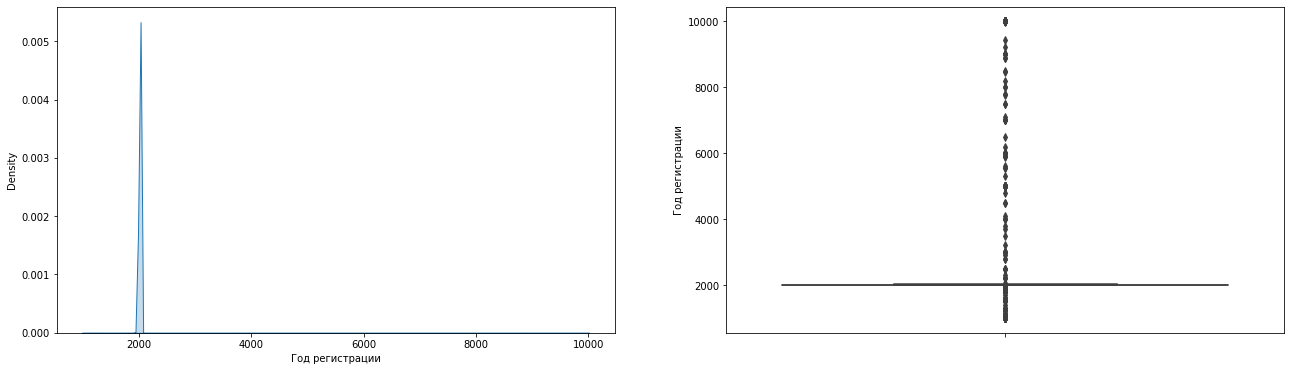

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(22,6))

plt.subplot(1,2,1)
ax = sns.kdeplot(df["Год регистрации"], shade=True)

plt.subplot(1,2,2)
ax = sns.boxplot(y=df["Год регистрации"])

plt.show()

In [ ]:
#Будем считать ошибкой такие года
df.loc[(df["Год регистрации"]<1940)|(df["Год регистрации"]>2022),"Год регистрации"]=None

In [ ]:
#Заменяем отсутствующий год на медианный для модели
g_s=df.groupby(['Марка',"Модель"]).median()["Год регистрации"]
def g_fill(stroka):
  return g_s[stroka["Марка"]][stroka["Модель"]]
df.loc[df["Год регистрации"].isnull(),"Год регистрации"]=df[df["Год регистрации"].isnull()].apply(g_fill, axis=1)
df

,Продавец,Цена,Тип кузова,Год регистрации,КПП,Мощность,Модель,Пробег,Тип двигателя,Марка,Требуется ремонт
0,Часное лицо,480.0,Седан,1993.0,МКПП,NaN,Golf,150000.0,Бензин,Volkswagen,Нет
1,Часное лицо,18300.0,Купе,2011.0,МКПП,190.0,A4,125000.0,Дизель,Audi,Да
2,Часное лицо,9800.0,Кроссовер,2004.0,АКПП,163.0,Grand Cherokee,125000.0,Дизель,Jeep,Нет
3,Часное лицо,1500.0,Малолитражка,2001.0,МКПП,75.0,Golf,150000.0,Бензин,Volkswagen,Нет
4,Часное лицо,3600.0,Малолитражка,2008.0,МКПП,69.0,Fabia,90000.0,Дизель,Skoda,Нет
...,...,...,...,...,...,...,...,...,...,...,...
371819,Часное лицо,2200.0,Седан,2005.0,None,NaN,Другое,20000.0,None,Sonstige Autos,Нет
371820,Часное лицо,1199.0,Кабриолет,2000.0,АКПП,101.0,Fortwo,125000.0,Бензин,Smart,Нет
371821,Часное лицо,9200.0,Минивен,1996.0,МКПП,102.0,Transporter,150000.0,Дизель,Volkswagen,Нет
371822,Часное лицо,3400.0,Универсал,2002.0,МКПП,100.0,Golf,150000.0,Дизель,Volkswagen,Нет


In [ ]:
df["Год регистрации"]=df["Год регистрации"].astype(int)
df

,Продавец,Цена,Тип кузова,Год регистрации,КПП,Мощность,Модель,Пробег,Тип двигателя,Марка,Требуется ремонт
0,Часное лицо,480.0,Седан,1993,МКПП,NaN,Golf,150000.0,Бензин,Volkswagen,Нет
1,Часное лицо,18300.0,Купе,2011,МКПП,190.0,A4,125000.0,Дизель,Audi,Да
2,Часное лицо,9800.0,Кроссовер,2004,АКПП,163.0,Grand Cherokee,125000.0,Дизель,Jeep,Нет
3,Часное лицо,1500.0,Малолитражка,2001,МКПП,75.0,Golf,150000.0,Бензин,Volkswagen,Нет
4,Часное лицо,3600.0,Малолитражка,2008,МКПП,69.0,Fabia,90000.0,Дизель,Skoda,Нет
...,...,...,...,...,...,...,...,...,...,...,...
371819,Часное лицо,2200.0,Седан,2005,None,NaN,Другое,20000.0,None,Sonstige Autos,Нет
371820,Часное лицо,1199.0,Кабриолет,2000,АКПП,101.0,Fortwo,125000.0,Бензин,Smart,Нет
371821,Часное лицо,9200.0,Минивен,1996,МКПП,102.0,Transporter,150000.0,Дизель,Volkswagen,Нет
371822,Часное лицо,3400.0,Универсал,2002,МКПП,100.0,Golf,150000.0,Дизель,Volkswagen,Нет


In [ ]:
#Заменяем отсутствующий тип КПП на медианный для модели
kpp_s=df.groupby(['Марка',"Модель"]).agg(pd.Series.mode)["КПП"]
def kpp_fill(stroka):
  return kpp_s[stroka["Марка"]][stroka["Модель"]]
df.loc[df["КПП"].isnull(),"КПП"]=df[df["КПП"].isnull()].apply(kpp_fill, axis=1)
df


,Продавец,Цена,Тип кузова,Год регистрации,КПП,Мощность,Модель,Пробег,Тип двигателя,Марка,Требуется ремонт
0,Часное лицо,480.0,Седан,1993,МКПП,NaN,Golf,150000.0,Бензин,Volkswagen,Нет
1,Часное лицо,18300.0,Купе,2011,МКПП,190.0,A4,125000.0,Дизель,Audi,Да
2,Часное лицо,9800.0,Кроссовер,2004,АКПП,163.0,Grand Cherokee,125000.0,Дизель,Jeep,Нет
3,Часное лицо,1500.0,Малолитражка,2001,МКПП,75.0,Golf,150000.0,Бензин,Volkswagen,Нет
4,Часное лицо,3600.0,Малолитражка,2008,МКПП,69.0,Fabia,90000.0,Дизель,Skoda,Нет
...,...,...,...,...,...,...,...,...,...,...,...
371819,Часное лицо,2200.0,Седан,2005,МКПП,NaN,Другое,20000.0,None,Sonstige Autos,Нет
371820,Часное лицо,1199.0,Кабриолет,2000,АКПП,101.0,Fortwo,125000.0,Бензин,Smart,Нет
371821,Часное лицо,9200.0,Минивен,1996,МКПП,102.0,Transporter,150000.0,Дизель,Volkswagen,Нет
371822,Часное лицо,3400.0,Универсал,2002,МКПП,100.0,Golf,150000.0,Дизель,Volkswagen,Нет


In [ ]:
#Заменяем отсутствующий тип двигателя на медианный для модели
dvig_s=df.groupby(['Марка',"Модель"]).agg(pd.Series.mode)
def dvig_fill(stroka):
  #return dvig_s[stroka["Марка"]][stroka["Модель"]]
  t=dvig_s.loc[(stroka["Марка"],stroka["Модель"])]["Тип двигателя"]
  if type("aaa") == type(t):
    return t
  t=list(filter(lambda x:x != "Другой",t))
  if len(t) == 0:
    return "Другой"
  return t[0]
df.loc[df["Тип двигателя"].isnull(),"Тип двигателя"]=df[df["Тип двигателя"].isnull()].apply(dvig_fill, axis=1)
df

,Продавец,Цена,Тип кузова,Год регистрации,КПП,Мощность,Модель,Пробег,Тип двигателя,Марка,Требуется ремонт
0,Часное лицо,480.0,Седан,1993,МКПП,NaN,Golf,150000.0,Бензин,Volkswagen,Нет
1,Часное лицо,18300.0,Купе,2011,МКПП,190.0,A4,125000.0,Дизель,Audi,Да
2,Часное лицо,9800.0,Кроссовер,2004,АКПП,163.0,Grand Cherokee,125000.0,Дизель,Jeep,Нет
3,Часное лицо,1500.0,Малолитражка,2001,МКПП,75.0,Golf,150000.0,Бензин,Volkswagen,Нет
4,Часное лицо,3600.0,Малолитражка,2008,МКПП,69.0,Fabia,90000.0,Дизель,Skoda,Нет
...,...,...,...,...,...,...,...,...,...,...,...
371819,Часное лицо,2200.0,Седан,2005,МКПП,NaN,Другое,20000.0,Бензин,Sonstige Autos,Нет
371820,Часное лицо,1199.0,Кабриолет,2000,АКПП,101.0,Fortwo,125000.0,Бензин,Smart,Нет
371821,Часное лицо,9200.0,Минивен,1996,МКПП,102.0,Transporter,150000.0,Дизель,Volkswagen,Нет
371822,Часное лицо,3400.0,Универсал,2002,МКПП,100.0,Golf,150000.0,Дизель,Volkswagen,Нет


In [ ]:
df[df["Мощность"]>1000]

,Продавец,Цена,Тип кузова,Год регистрации,КПП,Мощность,Модель,Пробег,Тип двигателя,Марка,Требуется ремонт
1898,Часное лицо,3200.0,Малолитражка,2004,МКПП,1398.0,Corolla,5000.0,Бензин,Toyota,Нет
2199,Часное лицо,NaN,Седан,1999,МКПП,1799.0,Vectra,150000.0,Бензин,Opel,Да
5582,Часное лицо,500.0,Универсал,1999,МКПП,1001.0,Astra,150000.0,Бензин,Opel,Нет
8038,Часное лицо,1499.0,Малолитражка,1999,МКПП,7515.0,Lupo,150000.0,Бензин,Volkswagen,Нет
8099,Часное лицо,1500.0,Малолитражка,2000,МКПП,1400.0,Civic,150000.0,Бензин,Honda,Нет
...,...,...,...,...,...,...,...,...,...,...,...
366102,Часное лицо,7500.0,Седан,2011,МКПП,1548.0,Scenic,90000.0,Бензин,Renault,Нет
366190,Часное лицо,250.0,Малолитражка,1999,МКПП,1241.0,Ypsilon,150000.0,Бензин,Lancia,Да
369303,Часное лицо,1500.0,Минивен,2001,МКПП,1001.0,Zafira,5000.0,Дизель,Opel,Нет
370908,Часное лицо,12500.0,Седан,2017,МКПП,2000.0,Другое,60000.0,Дизель,Chrysler,Нет


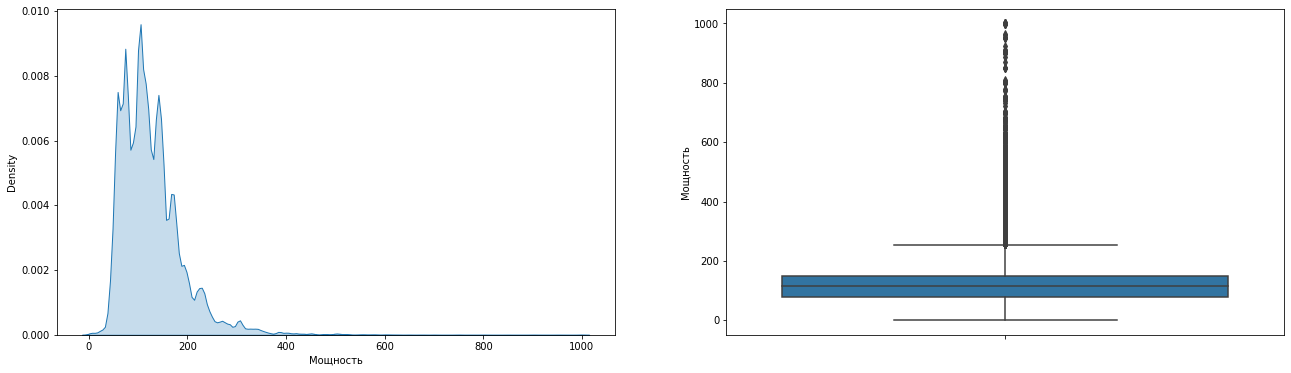

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(22,6))

plt.subplot(1,2,1)
ax = sns.kdeplot(df[df["Мощность"] <= 1000]["Мощность"], shade=True)

plt.subplot(1,2,2)
ax = sns.boxplot(y=df[df["Мощность"] <= 1000]["Мощность"])

plt.show()

5.	Поработайте со столбцом price. Постройте гистограмму, найдите выбросы (ящиковая диаграмма), удалите аномальные значения, постарайтесь привести к нормальному распределению

In [ ]:
df.Цена.describe()

count    3.610330e+05
mean     1.780296e+04
std      3.639729e+06
min      1.000000e+00
25%      1.250000e+03
50%      3.000000e+03
75%      7.490000e+03
max      2.147484e+09
Name: Цена, dtype: float64

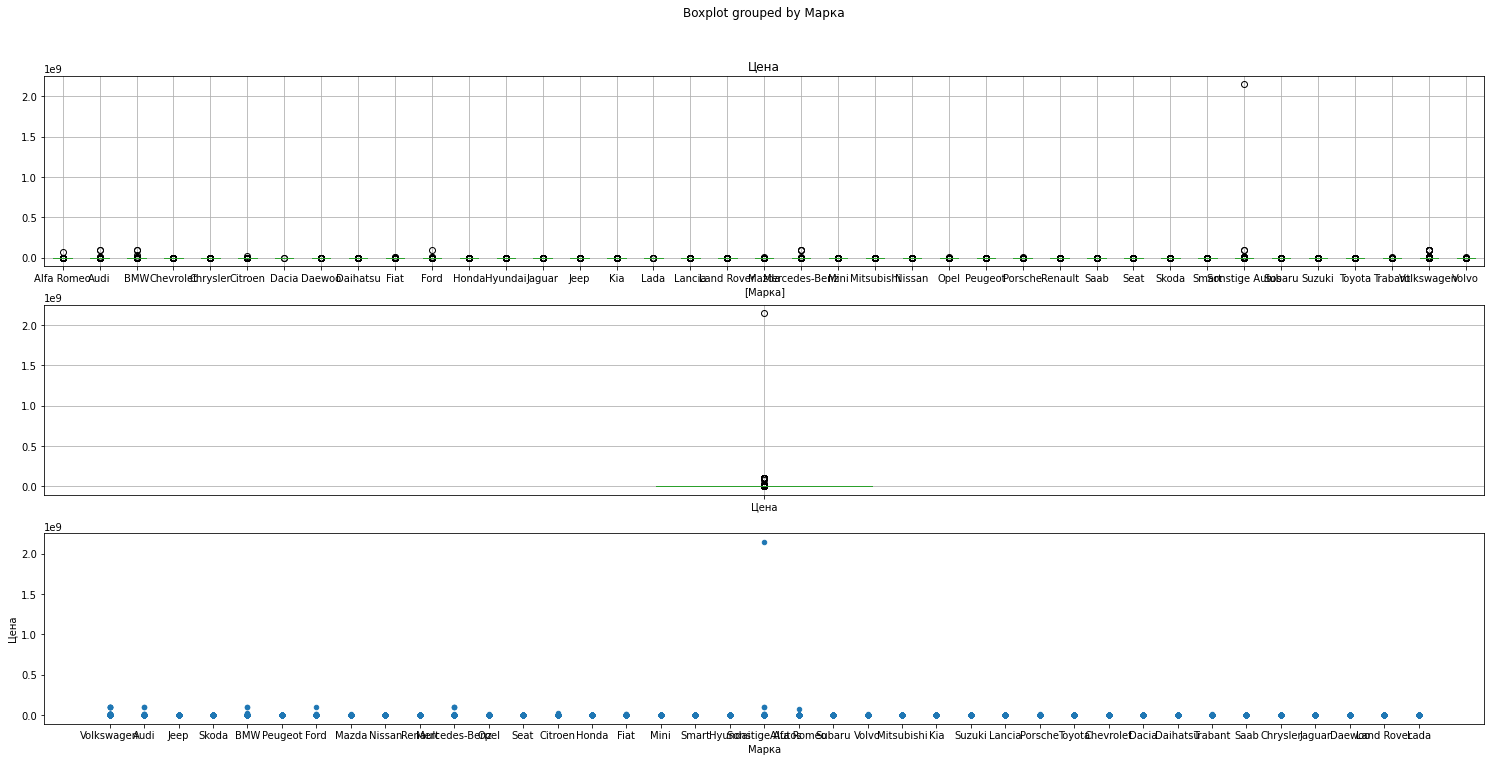

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=1)


df.boxplot('Цена', by=['Марка'], ax=axes[0], figsize=(25,12))
df.boxplot('Цена', ax=axes[1], figsize=(25,12))
df.plot.scatter(x="Марка", y='Цена', ax=axes[2], figsize=(25,12))

In [ ]:
grouped_prices = pd.DataFrame()
for name, group in df.groupby(['Марка', 'Модель']): #,  'Год регистрации'
  q1, q3 = group.Цена.quantile([.25, .75])
  d = {'Марка':name[0], 'Модель':name[1], 'q1': q1, 'q3': q3,  'M':group[(group.Цена > q1) & (group.Цена < q3)].Цена.median()} # 'Год регистрации':name[2],
  grouped_prices = grouped_prices.append(d, ignore_index=True)
grouped_prices

,Марка,Модель,q1,q3,M
0,Alfa Romeo,145,287.50,1050.00,600.0
1,Alfa Romeo,147,1100.00,3150.00,1999.0
2,Alfa Romeo,156,699.00,2100.00,1250.0
3,Alfa Romeo,159,5075.00,8525.00,6450.0
4,Alfa Romeo,Spider,3286.75,12325.00,6000.0
...,...,...,...,...,...
289,Volvo,V50,4200.00,7312.50,5500.0
290,Volvo,V60,13237.50,18750.00,16825.0
291,Volvo,XC серия,9900.00,18800.00,13000.0
292,Volvo,v70,1490.00,5566.25,2900.0


In [ ]:
def filter_q(row):

  if row.Цена is None:
    return False
  g = grouped_prices[(grouped_prices.Марка == row.Марка ) & (grouped_prices.Модель == row.Модель) ]
  q1, q3 = int(g.q1), int(g.q3)

  if q1 < row.Цена < q3:
    return True
  return False


df = df[df.apply(filter_q, axis=1)]

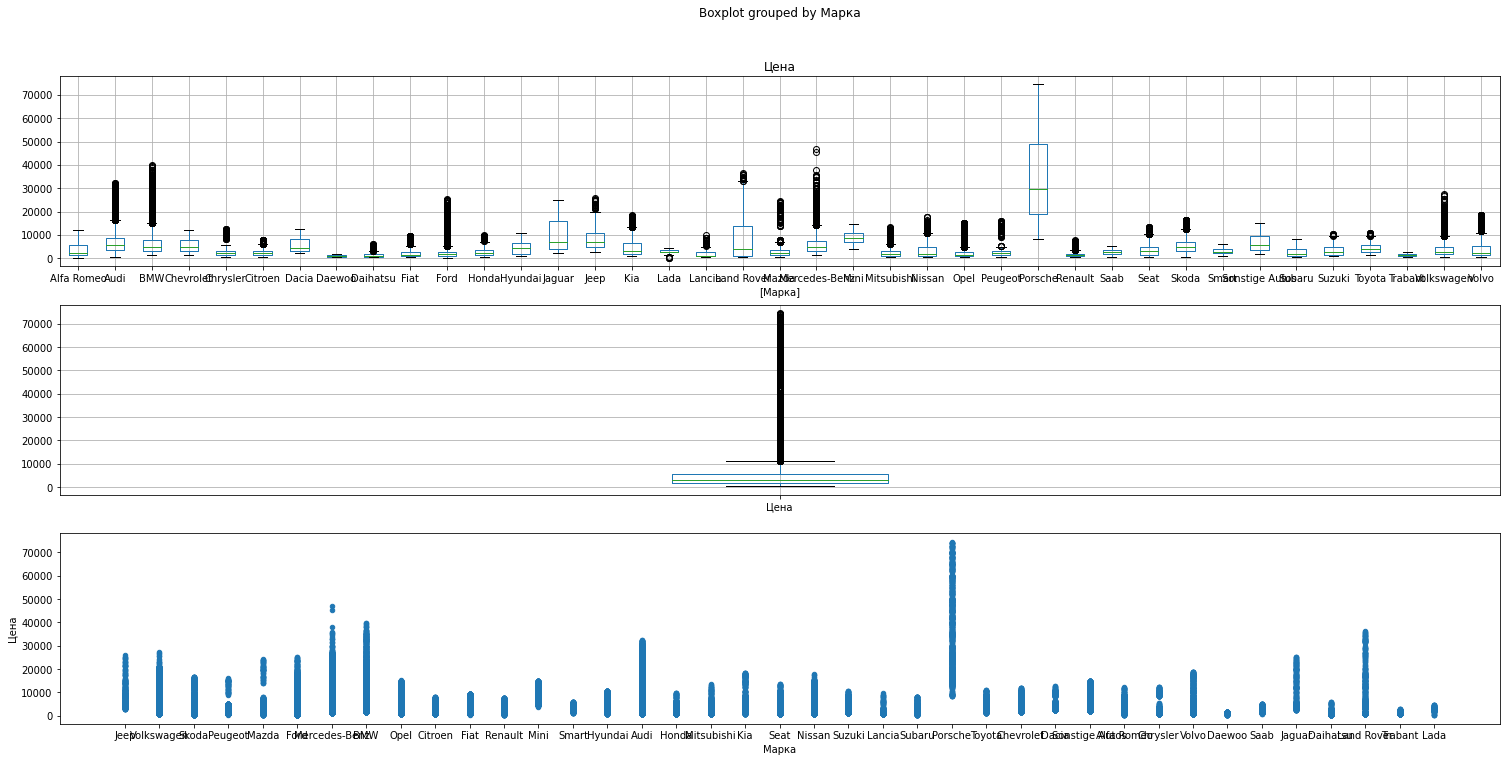

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=1)

df.boxplot('Цена', by=['Марка'], ax=axes[0], figsize=(25,12))
df.boxplot('Цена', ax=axes[1], figsize=(25,12))
df.plot.scatter(x="Марка", y='Цена', ax=axes[2], figsize=(25,12))

In [ ]:
df.groupby(['Марка', 'Модель']).Цена.describe()

count          mean          std      min      25%  \
Марка      Модель                                                         
Alfa Romeo 145        24.0    622.833333   232.156556    300.0    437.5   
           147       281.0   1995.523132   526.263046   1150.0   1500.0   
           156       360.0   1289.394444   387.263818    700.0    950.0   
           159       104.0   6581.009615   957.236156   5100.0   5837.5   
           Spider    102.0   6776.862745  2774.060623   3299.0   4275.0   
...                    ...           ...          ...      ...      ...   
Volvo      V50       125.0   5599.176000   807.891941   4222.0   4999.0   
           V60        24.0  16543.541667  1627.132553  13250.0  15500.0   
           XC серия  164.0  13439.871951  2904.399390   9968.0  10500.0   
           v70       313.0   3057.313099  1147.969165   1494.0   2000.0   
           Другое    274.0   2314.927007   929.836822   1050.0   1500.0   

                         50%      75%      max  
Марка      Модель                               
Alfa Romeo 145         600.0    791.0   1000.0  
           147        1999.0   2400.0   3000.0  
           156        1250.0   1600.0   2000.0  
           159        6450.0   7175.0   8500.0  
           Spider     6000.0   8937.5  12300.0  
...                      ...      ...      ...  
Volvo      V50        5500.0   6000.0   7300.0  
           V60       16825.0  17888.0  18700.0  
           XC серия  13000.0  16000.0  18750.0  
           v70        2900.0   3899.0   5555.0  
           Другое     2075.0   3000.0   4200.0  

[292 rows x 8 columns]

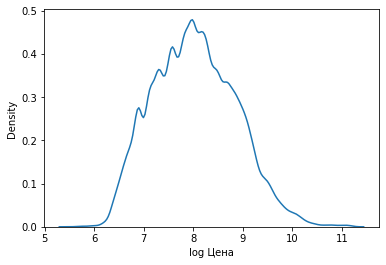

In [ ]:
df['log Цена'] = np.log(df.Цена)
sns.kdeplot(df['log Цена'])

In [ ]:
def thousands(x, pos):
    return '{:,.1f}тыс.р.'.format(x*1e-3)
fmtr = matplotlib.ticker.FuncFormatter(thousands)

Медианная стоимость машин составила 2999000 рублей


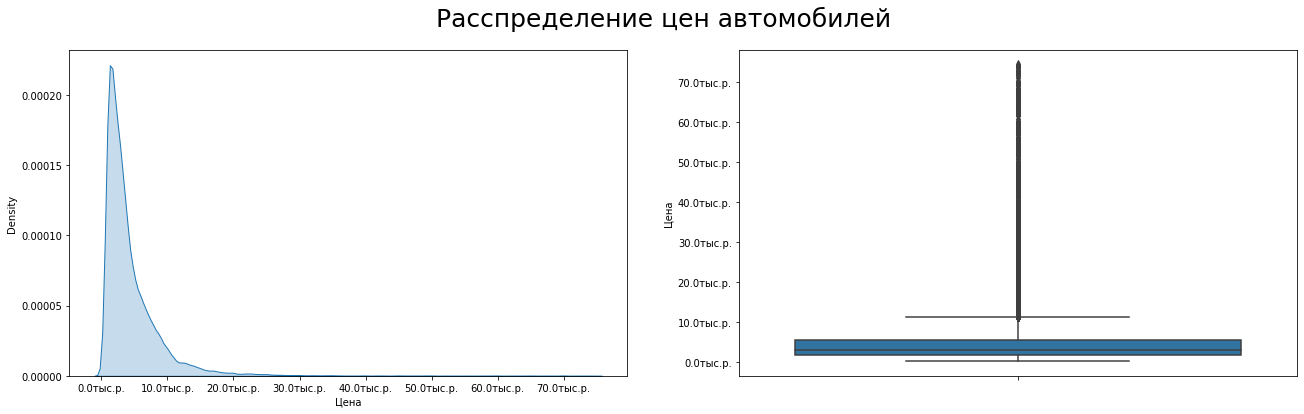

In [ ]:
print(f'Медианная стоимость машин составила {int(df.Цена.median())}000 рублей')

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(22,6))

plt.subplot(1,2,1)
ax = sns.kdeplot(df.Цена, shade=True)
_ = ax.xaxis.set_major_formatter(fmtr)

plt.subplot(1,2,2)
ax = sns.boxplot(y=df.Цена)
_ = ax.yaxis.set_major_formatter(fmtr)

fig.suptitle("Расспределение цен автомобилей",fontsize=25)
plt.show()

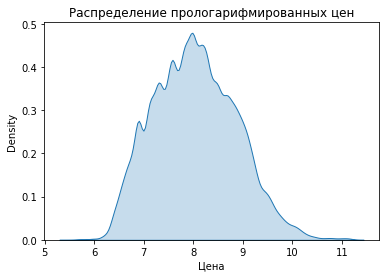

In [ ]:
sns.kdeplot(np.log(df.Цена), shade=True)
plt.title('Распределение прологарифмированных цен')
plt.show()

In [ ]:
def get_cols(df) -> list:
    '''
    функция возвращает список категориальных и числовых переменных
    '''
    categorical_feature_mask = df.dtypes == object
    number_feature_mask = df.dtypes != object
    numbers_cols = df.columns[number_feature_mask].tolist()
    categorical_cols = df.columns[categorical_feature_mask].tolist()
    return [numbers_cols, categorical_cols]

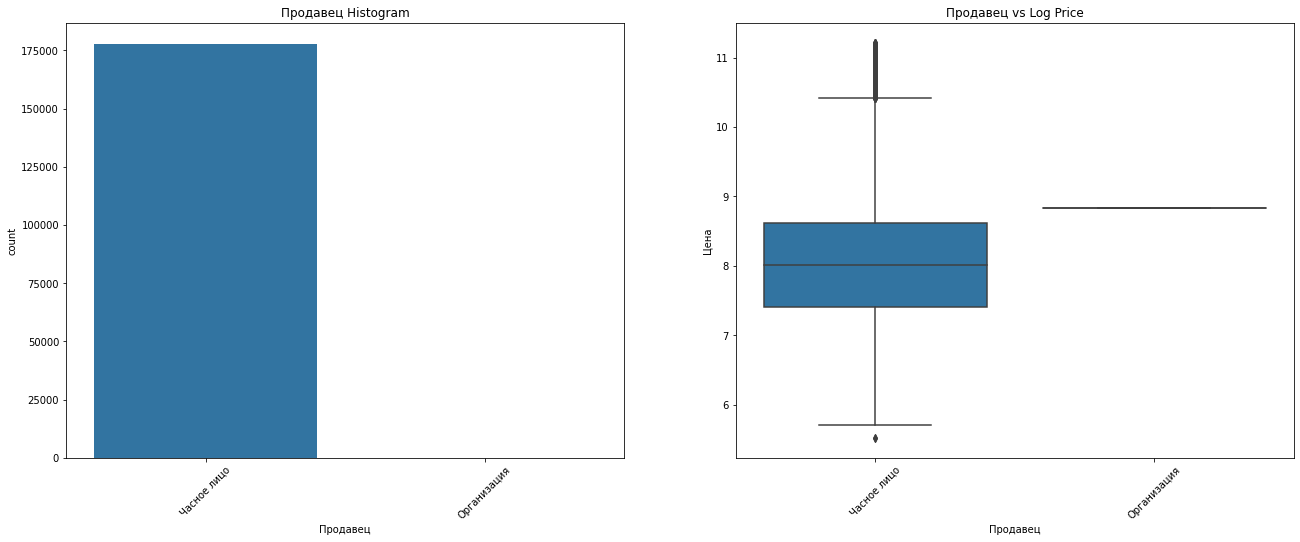

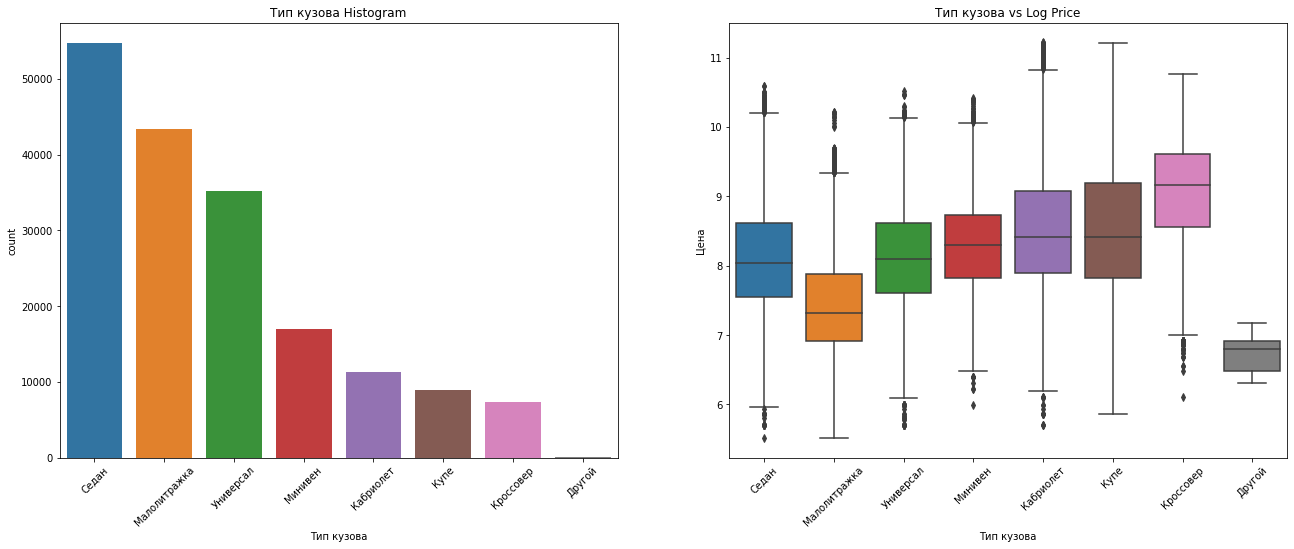

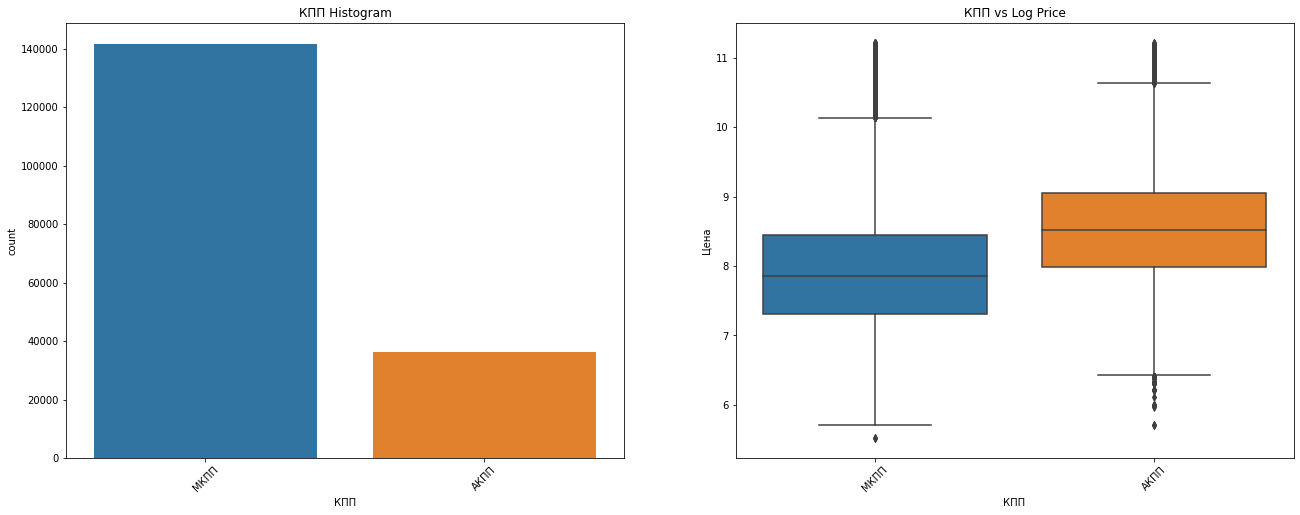

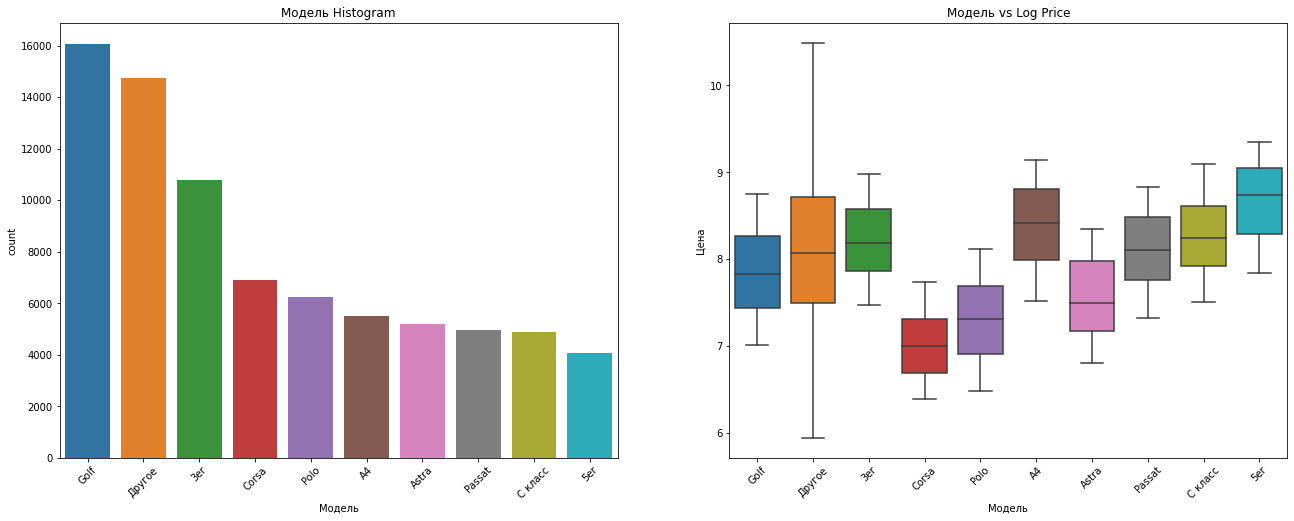

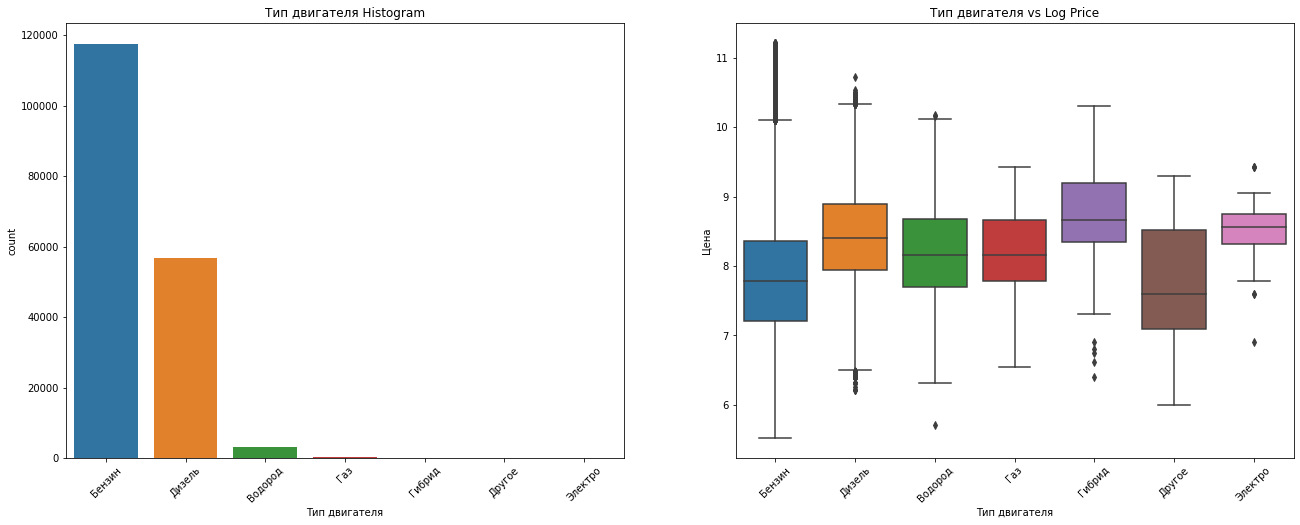

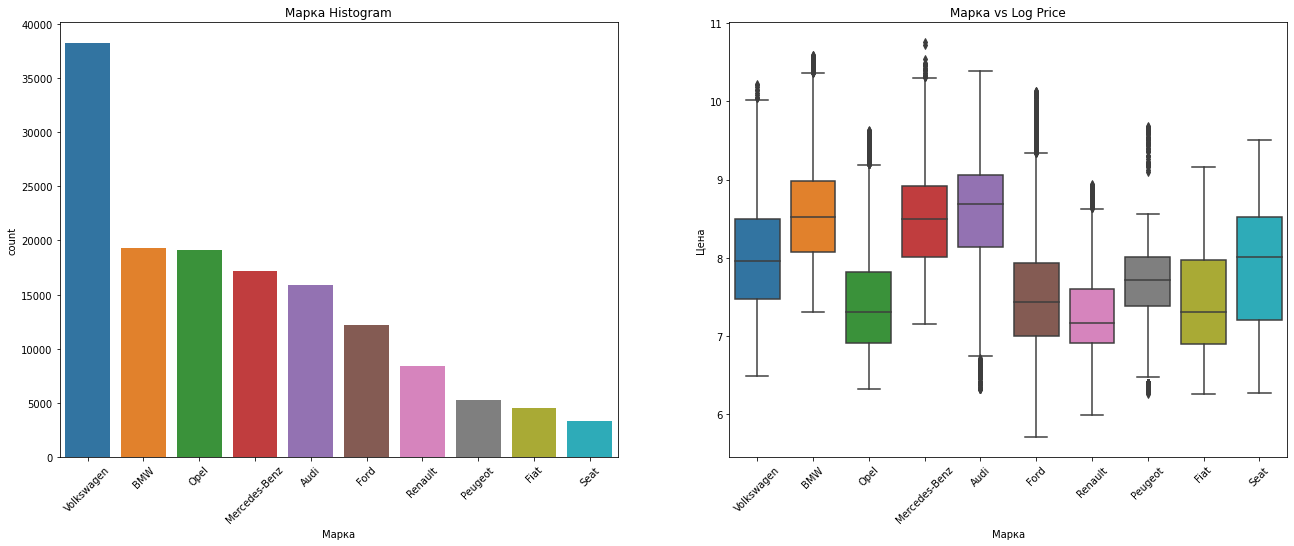

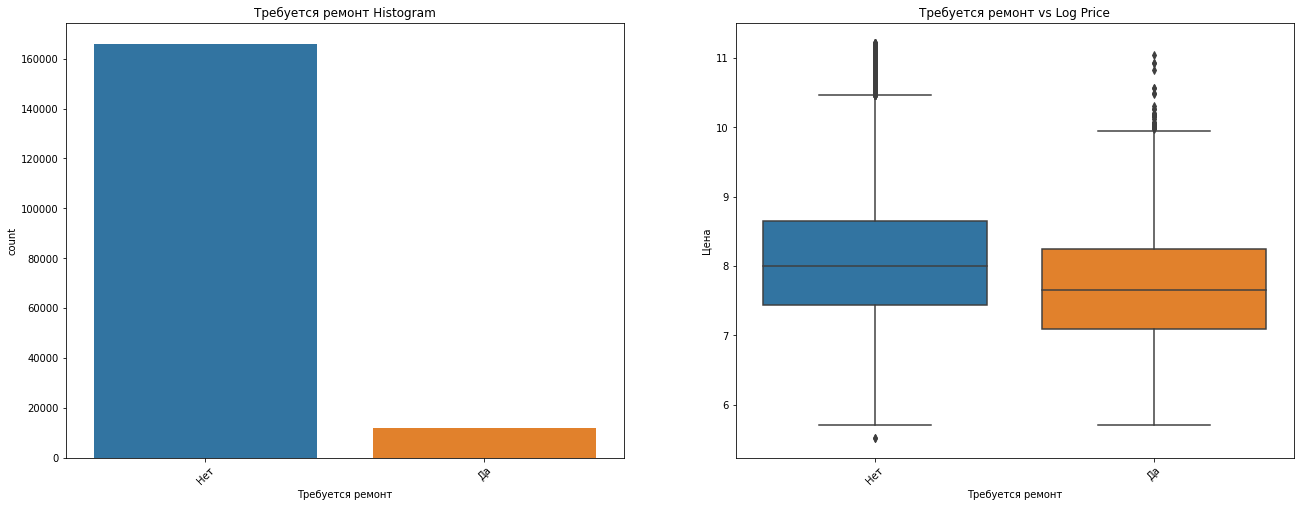

In [ ]:
numbers_cols, categorical_cols = get_cols(df)

for column in categorical_cols:

    columne_most_freq = df[column].value_counts()[:10].sort_values(ascending=False).index

    if '' in columne_most_freq:
        columne_most_freq = columne_most_freq.drop('')

    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(22,8))

    plt.subplot(1,2,1)
    plt.title(f'{column} Histogram')
    sns.countplot(
            df[df[column].isin(columne_most_freq)][column],
            order=columne_most_freq
    )

    plt.xticks(rotation=45)

    plt.subplot(1,2,2)
    plt.title(f'{column} vs Log Price')
    ax = sns.boxplot(
            x=df[df[column].isin(columne_most_freq)][column],
            y=np.log(df[df[column].isin(columne_most_freq)].Цена),
            order=columne_most_freq
    )
    plt.xticks(rotation=45)

    plt.show()

In [ ]:
# backup
import joblib
joblib.dump(df, 'df_afterprice.joblib')

['df_afterprice.joblib']

6.	Аналогично поработайте и с другими «важными для целевой функции price» параметрами (powerPS, yearOfRegistration, kilometer и т.д). «Важность» докажите через коэффициент корреляции. Сделайте визуализацию

In [ ]:
import joblib

df = joblib.load('df_afterprice.joblib')

In [ ]:
def detect_corr(k):
  k = abs(k)
  corr_description = ['очень слабая', 'слабая', 'средняя', 'высокая', 'очень высокая']
  if 0 <= k < .3: return corr_description[0]
  if .3 <= k < .5: return corr_description[1]
  if .5 <= k < .7: return corr_description[2]
  if .7 <= k < .9: return corr_description[3]
  if .9 <= k < 1: return corr_description[4]

In [ ]:
for x in ['Цена']:
    q75,q25 = np.percentile(df.loc[:,x],[75,25])
    intr_qr = q75-q25

    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)

    df.loc[df[x] < min,x] = np.nan
    df.loc[df[x] > max,x] = np.nan
df = df.dropna(axis = 0)
df.isnull().sum()

Продавец            0
Цена                0
Тип кузова          0
Год регистрации     0
КПП                 0
Мощность            0
Модель              0
Пробег              0
Тип двигателя       0
Марка               0
Требуется ремонт    0
log Цена            0
dtype: int64

In [ ]:
le_kpp=LabelEncoder()
le_kpp.fit(df.КПП)
df["К КПП"]=le_kpp.transform(df.КПП)
df

,Продавец,Цена,Тип кузова,Год регистрации,КПП,Мощность,Модель,Пробег,Тип двигателя,Марка,Требуется ремонт,log Цена,К КПП
2,Часное лицо,9800.0,Кроссовер,2004,АКПП,163.0,Grand Cherokee,125000.0,Дизель,Jeep,Нет,9.190138,0
3,Часное лицо,1500.0,Малолитражка,2001,МКПП,75.0,Golf,150000.0,Бензин,Volkswagen,Нет,7.313220,1
4,Часное лицо,3600.0,Малолитражка,2008,МКПП,69.0,Fabia,90000.0,Дизель,Skoda,Нет,8.188689,1
6,Часное лицо,2200.0,Кабриолет,2004,МКПП,109.0,2 серия,150000.0,Бензин,Peugeot,Нет,7.696213,1
10,Часное лицо,2000.0,Седан,2004,МКПП,105.0,3 серия,150000.0,Бензин,Mazda,Нет,7.600902,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
371812,Часное лицо,1490.0,Малолитражка,1998,МКПП,50.0,Lupo,150000.0,Бензин,Volkswagen,Нет,7.306531,1
371814,Часное лицо,3999.0,Универсал,2005,МКПП,3.0,3er,150000.0,Дизель,BMW,Нет,8.293800,1
371815,Часное лицо,5250.0,Универсал,2016,АКПП,150.0,159,150000.0,Дизель,Alfa Romeo,Нет,8.565983,0
371821,Часное лицо,9200.0,Минивен,1996,МКПП,102.0,Transporter,150000.0,Дизель,Volkswagen,Нет,9.126959,1


In [ ]:
le_kuz=LabelEncoder()
le_kuz.fit(df["Тип кузова"])
df["К Кузов"]=le_kuz.transform(df["Тип кузова"])
df

,Продавец,Цена,Тип кузова,Год регистрации,КПП,Мощность,Модель,Пробег,Тип двигателя,Марка,Требуется ремонт,log Цена,К КПП,К Кузов
2,Часное лицо,9800.0,Кроссовер,2004,АКПП,163.0,Grand Cherokee,125000.0,Дизель,Jeep,Нет,9.190138,0,2
3,Часное лицо,1500.0,Малолитражка,2001,МКПП,75.0,Golf,150000.0,Бензин,Volkswagen,Нет,7.313220,1,4
4,Часное лицо,3600.0,Малолитражка,2008,МКПП,69.0,Fabia,90000.0,Дизель,Skoda,Нет,8.188689,1,4
6,Часное лицо,2200.0,Кабриолет,2004,МКПП,109.0,2 серия,150000.0,Бензин,Peugeot,Нет,7.696213,1,1
10,Часное лицо,2000.0,Седан,2004,МКПП,105.0,3 серия,150000.0,Бензин,Mazda,Нет,7.600902,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371812,Часное лицо,1490.0,Малолитражка,1998,МКПП,50.0,Lupo,150000.0,Бензин,Volkswagen,Нет,7.306531,1,4
371814,Часное лицо,3999.0,Универсал,2005,МКПП,3.0,3er,150000.0,Дизель,BMW,Нет,8.293800,1,7
371815,Часное лицо,5250.0,Универсал,2016,АКПП,150.0,159,150000.0,Дизель,Alfa Romeo,Нет,8.565983,0,7
371821,Часное лицо,9200.0,Минивен,1996,МКПП,102.0,Transporter,150000.0,Дизель,Volkswagen,Нет,9.126959,1,5


In [ ]:
df["Норм Год регистрации"] = df["Год регистрации"]-df["Год регистрации"].min()
df

,Продавец,Цена,Тип кузова,Год регистрации,КПП,Мощность,Модель,Пробег,Тип двигателя,Марка,Требуется ремонт,log Цена,К КПП,К Кузов,Норм Год регистрации
2,Часное лицо,9800.0,Кроссовер,2004,АКПП,163.0,Grand Cherokee,125000.0,Дизель,Jeep,Нет,9.190138,0,2,63
3,Часное лицо,1500.0,Малолитражка,2001,МКПП,75.0,Golf,150000.0,Бензин,Volkswagen,Нет,7.313220,1,4,60
4,Часное лицо,3600.0,Малолитражка,2008,МКПП,69.0,Fabia,90000.0,Дизель,Skoda,Нет,8.188689,1,4,67
6,Часное лицо,2200.0,Кабриолет,2004,МКПП,109.0,2 серия,150000.0,Бензин,Peugeot,Нет,7.696213,1,1,63
10,Часное лицо,2000.0,Седан,2004,МКПП,105.0,3 серия,150000.0,Бензин,Mazda,Нет,7.600902,1,6,63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371812,Часное лицо,1490.0,Малолитражка,1998,МКПП,50.0,Lupo,150000.0,Бензин,Volkswagen,Нет,7.306531,1,4,57
371814,Часное лицо,3999.0,Универсал,2005,МКПП,3.0,3er,150000.0,Дизель,BMW,Нет,8.293800,1,7,64
371815,Часное лицо,5250.0,Универсал,2016,АКПП,150.0,159,150000.0,Дизель,Alfa Romeo,Нет,8.565983,0,7,75
371821,Часное лицо,9200.0,Минивен,1996,МКПП,102.0,Transporter,150000.0,Дизель,Volkswagen,Нет,9.126959,1,5,55


In [ ]:
df.iloc[df['Мощность'] > 1000] = None

Корреляция: 52% (средняя)


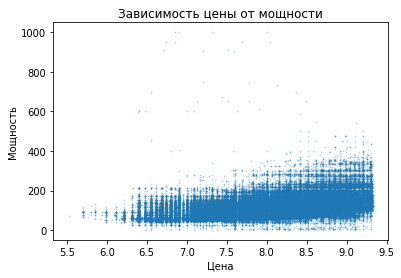

In [ ]:

pow_corr = df['log Цена'].corr(df["Мощность"])
print(
    'Корреляция: ',
    int(pow_corr * 100), '% ',
    '(', detect_corr(pow_corr), ')', sep='')

plt.plot(df['log Цена'], df["Мощность"], 'o', alpha=0.2, markersize=1)

plt.xlabel('Цена')
plt.ylabel('Мощность')
plt.title('Зависимость цены от мощности');


Корреляция: 26% (очень слабая)


Text(0.5, 1.0, 'Зависимость цены от года регистрации')

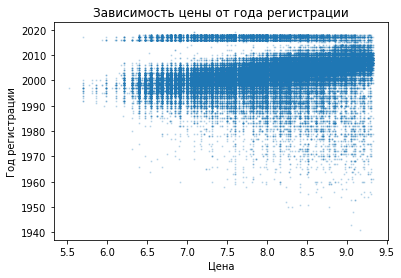

In [ ]:
year_corr = df['log Цена'].corr(df['Год регистрации'])
print(
    'Корреляция: ',
    int(year_corr * 100), '% ',
    '(', detect_corr(year_corr), ')', sep='')


plt.plot(df['log Цена'], df['Год регистрации'], 'o', alpha=0.2, markersize=1)

plt.xlabel('Цена')
plt.ylabel('Год регистрации')
plt.title('Зависимость цены от года регистрации')

Корреляция: -12% (очень слабая)


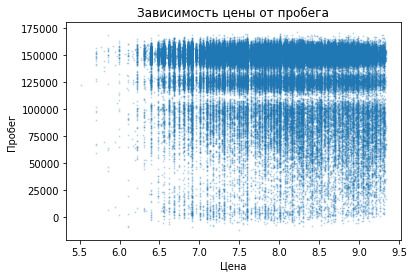

In [ ]:
k_corr = df['log Цена'].corr(df['Пробег'])
print(
    'Корреляция: ',
    int(k_corr * 100), '% ',
    '(', detect_corr(k_corr), ')', sep='')

noise = np.random.normal(0, 5000, size=len(df.Пробег))
k_jitter = df.Пробег + noise

plt.plot(df['log Цена'], k_jitter, 'o', alpha=0.2, markersize=1)

plt.xlabel('Цена')
plt.ylabel('Пробег')
plt.title('Зависимость цены от пробега');

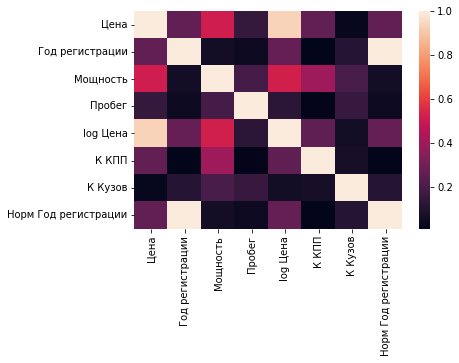

In [ ]:
sns.heatmap(df.corr().abs(),
        xticklabels=df.corr().abs().columns,
        yticklabels=df.corr().abs().columns)

7.	Постройте ящиковые диаграммы зависимости gearbox, fuelType, vehicleType, notRepairedDamage от price. Сделайте выводы. Можно ли убрать значения с малой частотой? Повлияет ли это на дальнейшее исследование?

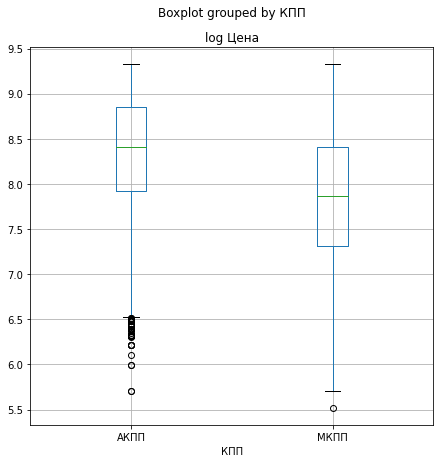

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

df.boxplot(by='КПП', column='log Цена', figsize=(7, 7))
plt.show()

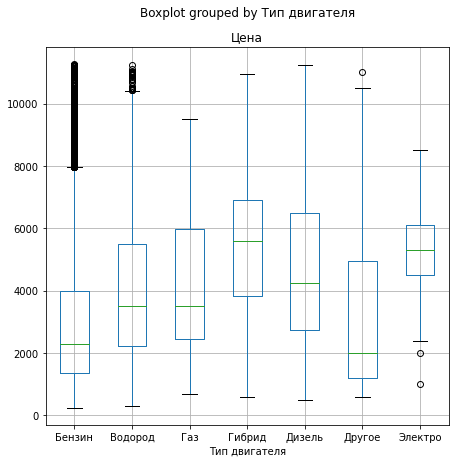

In [ ]:
df.boxplot(by='Тип двигателя', column='Цена', figsize=(7, 7))
plt.show()

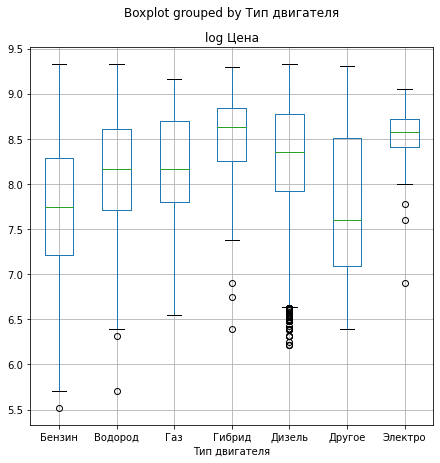

In [ ]:
df.boxplot(by='Тип двигателя', column='log Цена', figsize=(7, 7))
plt.show()

В сравнении видно, насколько меньше выбросов и насколько Эффективнее себя показывает log цена

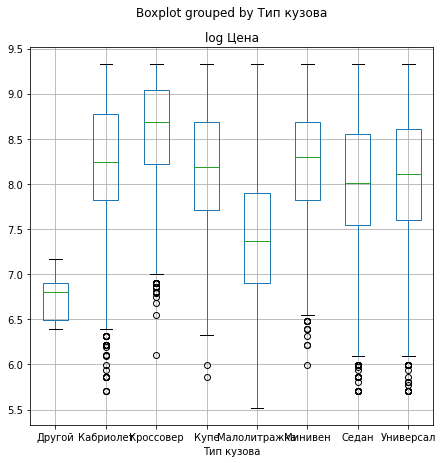

In [ ]:
df.boxplot(by='Тип кузова', column='log Цена', figsize=(7, 7))
plt.show()

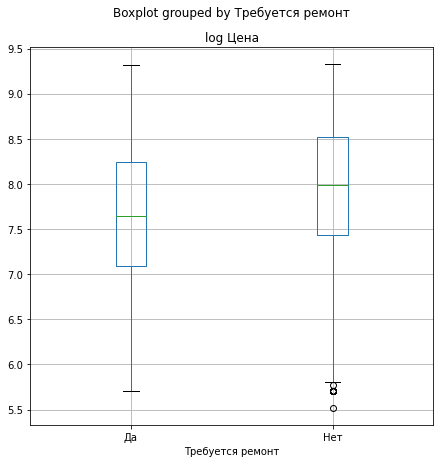

In [ ]:
df.boxplot(by='Требуется ремонт', column='log Цена', figsize=(7, 7))
plt.show()

8.	Реализуйте минимум 3 алгоритма по работе с категориальными данными

Label Encoder

Реализация Label Encoder в sklearn прежде всего сортирует по алфавиту уникальные значения, потом присваивает им порядковый номер

Главный недостаток Label Encoder'a - создание избыточных зависимостей в данных.

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
data_new = labelencoder.fit_transform(df.КПП)
data_new[:10]

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
labelencoder.classes_

array(['АКПП', 'МКПП', None], dtype=object)

One-Hot Encoder

Данный тип кодирования, основывается на создании бинарных признаков, которые показывают принадлежность к уникальному значению.

Главный недостаток One-Hot Encoder'a заключается в существенном увеличении объема данных, так как большие по количеству уникальных значений признаки кодируются большим количеством бинарных признаков.

In [ ]:
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder()
data_new = onehotencoder.fit_transform(df[['КПП']])
pd.DataFrame(data_new.toarray(),
columns=onehotencoder.categories_).head(10)

,АКПП,МКПП,NaN
0,1.0,0.0,0.0
1,0.0,1.0,0.0
2,0.0,1.0,0.0
3,0.0,1.0,0.0
4,0.0,1.0,0.0
5,0.0,1.0,0.0
6,0.0,1.0,0.0
7,0.0,1.0,0.0
8,0.0,1.0,0.0
9,0.0,1.0,0.0


Binary Encoder
Для решения проблемы One-Hot Encoding'а с размером получаемого после кодирования пространства, была предложена идея, использующая в себе принцип перевода десятичных чисел в двоичное представление.

Принцип перевода заключается в том, что десятичное число N можно представить log(N), где log - логарифм по основанию 2, бинарными значениями, принимающими значения {0,1}. Например число 22 можно представить как 10110, т.е 5 битами.

In [ ]:
!pip install category_encoders
from category_encoders.binary import BinaryEncoder
bn = BinaryEncoder()
bn.fit_transform(df[['КПП']])[:10]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


,КПП_0,КПП_1
2,0,1
3,1,0
4,1,0
6,1,0
10,1,0
11,1,0
13,1,0
18,1,0
19,1,0
20,1,0


In [ ]:
df.count()

Продавец                151293
Цена                    151293
Тип кузова              151293
Год регистрации         151293
КПП                     151293
Мощность                151293
Модель                  151293
Пробег                  151293
Тип двигателя           151293
Марка                   151293
Требуется ремонт        151293
log Цена                151293
К КПП                   151293
К Кузов                 151293
Норм Год регистрации    151293
dtype: int64

In [ ]:
df = df.dropna()
df = df.reset_index(drop=True)

In [ ]:
for i in df.select_dtypes('object').columns:
  print(*[i, df[i].unique()]  ) #df[i].unique()

Продавец ['Часное лицо' 'Организация']
Тип кузова ['Кроссовер' 'Малолитражка' 'Кабриолет' 'Седан' 'Универсал' 'Минивен'
 'Купе' 'Другой']
КПП ['АКПП' 'МКПП']
Модель ['Grand Cherokee' 'Golf' 'Fabia' '2 серия' '3 серия' 'Passat' 'C-Max'
 'A класс' 'Scirocco' '5er' 'Meriva' 'C4' 'Punto' 'E класс' 'Clio'
 'Kadett' 'One' 'Fortwo' '1er' 'Другое' 'A8' 'Fiesta' 'C класс' 'Sprinter'
 'Escort' 'Transporter' 'Focus' 'A4' 'Civic' 'A6' '3er' 'Slk' 'Twingo'
 'Z серия' 'Sorento' 'Astra' 'Ibiza' 'Eos' 'Touran' 'Getz' 'Insignia' 'Ka'
 'Almera' 'Lupo' 'Corsa' 'Mondeo' 'Colt' 'Polo' 'Impreza' 'Megane' '7er'
 'I серия' '6 серия' 'A3' 'Ceed' 'Octavia' 'RX серия' 'Fox' 'Vectra' 'Rio'
 'Micra' 'Logan' 'Omega' 'A2' '147' 'C3' '1 серия' 'Sharan' 'Avensis'
 'Roomster' 'Kaefer' 'Vito' 'Santa' 'Leon' 'Cooper' '4 серия' 'Sportage'
 'Laguna' 'Ptcruiser' 'CLK' 'B класс' 'Galaxy' 'Zafira' 'Juke' 'Scenic'
 'V40' 'Carisma' 'Accord' 'Corolla' 'Lanos' 'X серия' 'Verso' 'Swift'
 'RAV4' '159' 'Picanto' 'Berlingo' 'Alhambra

В нашем датасете категорировать необходимо

Продавец LabelEncoder

Тип двигателя OneHotEncoder

Требуется ремонт BinaryEncoder

Марка LabelEncoder

Модель LabelEncoder

Тип кузова LabelEncoder

КПП LabelEncoder

In [ ]:
le_saler = LabelEncoder()
le_saler.fit(df['Продавец'])
df['К Продавец'] = le_saler.transform(df['Продавец'])
df['К Продавец'].unique()

array([1, 0])

In [ ]:
class OneHotEnc():
  def __init__(self):
    True

  def fit(self, col, prefix = None):

    dummies = pd.get_dummies(col, prefix=prefix)

    self.classes_ = dummies.columns
    self.prefix = prefix
    self.types = col.unique()
    return dummies

  def transform(self, val):
    if self.prefix is not None:
      val = self.prefix + "_" + val
    return pd.DataFrame({k: (0 if f'{val}' != k else 1) for k in self.classes_}, index=[0])


le_eng = OneHotEnc()
df = pd.concat([df, le_eng.fit(df['Тип двигателя'], prefix='eng')], axis=1)
df.columns

Index(['Продавец', 'Цена', 'Тип кузова', 'Год регистрации', 'КПП', 'Мощность',
       'Модель', 'Пробег', 'Тип двигателя', 'Марка', 'Требуется ремонт',
       'log Цена', 'К КПП', 'К Кузов', 'Норм Год регистрации', 'К Продавец',
       'eng_Бензин', 'eng_Водород', 'eng_Газ', 'eng_Гибрид', 'eng_Дизель',
       'eng_Другое', 'eng_Электро'],
      dtype='object')

In [ ]:
def encode_binary(X, label1='Да', label0='Нет'):
  return X.map({label1: 1, label0: 0})

df['К Требуется ремонт'] = encode_binary( df['Требуется ремонт'], 'Да', 'Нет')
print(df['К Требуется ремонт'].unique())
df[['Требуется ремонт', 'К Требуется ремонт']]

[0 1]


,Требуется ремонт,К Требуется ремонт
0,Нет,0
1,Нет,0
2,Нет,0
3,Нет,0
4,Нет,0
...,...,...
151288,Нет,0
151289,Нет,0
151290,Нет,0
151291,Нет,0


In [ ]:
le_marka=LabelEncoder()
le_marka.fit(df.Марка)
df["К Марка"]=le_marka.transform(df.Марка)
df['К Марка'].unique()

array([14, 37, 30, 25, 19, 10, 20,  2, 24,  5,  9, 27, 21, 31, 12,  1, 11,
       22, 15, 29, 23, 34, 17, 33, 35,  6, 32,  0,  4, 38,  7, 28,  3,  8,
       18, 36, 13, 16, 26])

In [ ]:
le_model=LabelEncoder()
le_model.fit(df['Модель'])
df["К Модель"]=le_model.transform(df['Модель'])
df['К Модель'].unique()

array([103, 102,  89,   7,   9, 150,  49,  24, 172,  15, 133,  53, 156,
        83,  68, 114, 146,  94,   6, 220,  29,  90,  47, 183,  86, 195,
        91,  27,  67,  28,  11, 178, 197, 215, 179,  37, 105,  85, 193,
       101, 107, 113,  33, 126,  75, 137,  70, 153, 106, 132,  18, 104,
        16,  26,  63, 144, 159,  95, 202, 161, 134, 125, 145,  25,   3,
        52,   0, 175,  39, 163, 115, 205, 170, 123,  72,  12, 182, 119,
       155,  56,  42, 100, 216, 111, 171, 200,  61,  30,  74, 121, 209,
       203, 187, 158,   5, 152,  44,  32, 192, 162,  99, 131, 112,  43,
        31,  82, 117,  78,  58, 129, 128, 198, 154,  54,  17,  45, 164,
       190,   4,  14,   1,  87,  19, 212, 185,  34,  36,  62, 219,  93,
       109, 194, 188, 211,  66, 110, 180, 120,  71, 176, 166,  60,  97,
        51,  80, 213, 169, 142, 173, 181,  21, 140,  35, 177,  22,  65,
        50,  92, 157, 184, 148, 207,  73,  38, 191, 199,  57,  41, 141,
       149, 136, 206,  48, 196,  98,  96,  13, 135, 108, 186,  2

In [ ]:
le_kpp=LabelEncoder()
le_kpp.fit(df.КПП)
df["К КПП"]=le_kpp.transform(df.КПП)
df["К КПП"].unique()

array([0, 1])

In [ ]:
le_kuz=LabelEncoder()
le_kuz.fit(df["Тип кузова"])
df["К Кузов"]=le_kuz.transform(df["Тип кузова"])
df["К Кузов"].unique()

array([2, 4, 1, 6, 7, 5, 3, 0])

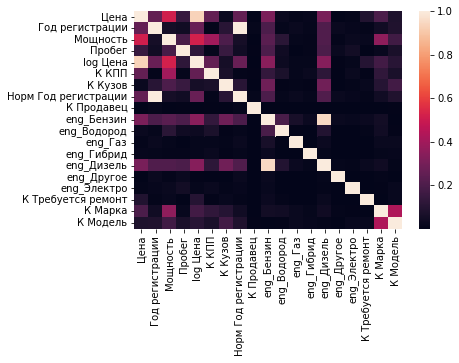

In [ ]:
sns.heatmap(df.corr().abs(),
        xticklabels=df.corr().abs().columns,
        yticklabels=df.corr().abs().columns)

9.	Сделайте нормализацию (стандартизацию) датасета

In [ ]:
df

,Продавец,Цена,Тип кузова,Год регистрации,КПП,Мощность,Модель,Пробег,Тип двигателя,Марка,...,eng_Бензин,eng_Водород,eng_Газ,eng_Гибрид,eng_Дизель,eng_Другое,eng_Электро,К Требуется ремонт,К Марка,К Модель
0,Часное лицо,9800.0,Кроссовер,2004.0,АКПП,163.0,Grand Cherokee,125000.0,Дизель,Jeep,...,0,0,0,0,1,0,0,0,14,103
1,Часное лицо,1500.0,Малолитражка,2001.0,МКПП,75.0,Golf,150000.0,Бензин,Volkswagen,...,1,0,0,0,0,0,0,0,37,102
2,Часное лицо,3600.0,Малолитражка,2008.0,МКПП,69.0,Fabia,90000.0,Дизель,Skoda,...,0,0,0,0,1,0,0,0,30,89
3,Часное лицо,2200.0,Кабриолет,2004.0,МКПП,109.0,2 серия,150000.0,Бензин,Peugeot,...,1,0,0,0,0,0,0,0,25,7
4,Часное лицо,2000.0,Седан,2004.0,МКПП,105.0,3 серия,150000.0,Бензин,Mazda,...,1,0,0,0,0,0,0,0,19,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151288,Часное лицо,1490.0,Малолитражка,1998.0,МКПП,50.0,Lupo,150000.0,Бензин,Volkswagen,...,1,0,0,0,0,0,0,0,37,126
151289,Часное лицо,3999.0,Универсал,2005.0,МКПП,3.0,3er,150000.0,Дизель,BMW,...,0,0,0,0,1,0,0,0,2,11
151290,Часное лицо,5250.0,Универсал,2016.0,АКПП,150.0,159,150000.0,Дизель,Alfa Romeo,...,0,0,0,0,1,0,0,0,0,5
151291,Часное лицо,9200.0,Минивен,1996.0,МКПП,102.0,Transporter,150000.0,Дизель,Volkswagen,...,0,0,0,0,1,0,0,0,37,195


In [ ]:
df.describe()

,Цена,Год регистрации,Мощность,Пробег,log Цена,К КПП,К Кузов,Норм Год регистрации,К Продавец,eng_Бензин,eng_Водород,eng_Газ,eng_Гибрид,eng_Дизель,eng_Другое,eng_Электро,К Требуется ремонт,К Марка,К Модель
count,151293.000000,151293.000000,151293.000000,151293.000000,151293.000000,151293.000000,151293.000000,151293.000000,151293.000000,151293.000000,151293.000000,151293.000000,151293.000000,151293.000000,151293.000000,151293.000000,151293.000000,151293.000000,151293.000000
mean,3618.246429,2002.632468,116.584594,135846.998870,7.947441,0.810183,5.087486,61.632468,0.999993,0.670057,0.018177,0.002056,0.000390,0.308732,0.000344,0.000245,0.071087,20.563337,98.873140
std,2508.732101,6.170187,50.121521,29293.092492,0.723936,0.392158,1.656759,6.170187,0.002571,0.470194,0.133590,0.045292,0.019744,0.461972,0.018536,0.015637,0.256971,13.007037,68.302765
min,250.000000,1941.000000,1.000000,5000.000000,5.521461,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1600.000000,2000.000000,75.000000,125000.000000,7.377759,1.000000,4.000000,59.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,36.000000
50%,2900.000000,2003.000000,109.000000,150000.000000,7.972466,1.000000,6.000000,62.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,24.000000,94.000000
75%,4999.000000,2006.000000,143.000000,150000.000000,8.516993,1.000000,6.000000,65.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,34.000000,153.000000
max,11270.000000,2019.000000,1000.000000,150000.000000,9.329900,1.000000,7.000000,78.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,38.000000,220.000000


In [ ]:
df["Норм Год регистрации"] = df["Год регистрации"]-df["Год регистрации"].min()
df['Норм Пробег'] = df['Пробег'] / 5000
std_god=StandardScaler().fit(df[["Норм Год регистрации"]])
std_mosh=StandardScaler().fit(df[["Мощность"]])
std_probeg=StandardScaler().fit(df[["Норм Пробег"]])
df["Стд Мощность"]=std_mosh.transform(df[["Мощность"]])
df["Стд Год регистрации"]=std_god.transform(df[["Норм Год регистрации"]])
df["Стд Пробег"]=std_probeg.transform(df[["Норм Пробег"]])
df

,Продавец,Цена,Тип кузова,Год регистрации,КПП,Мощность,Модель,Пробег,Тип двигателя,Марка,...,eng_Дизель,eng_Другое,eng_Электро,К Требуется ремонт,К Марка,К Модель,Норм Пробег,Стд Мощность,Стд Год регистрации,Стд Пробег
0,Часное лицо,9800.0,Кроссовер,2004.0,АКПП,163.0,Grand Cherokee,125000.0,Дизель,Jeep,...,1,0,0,0,14,103,25.0,0.926060,0.221636,-0.370293
1,Часное лицо,1500.0,Малолитражка,2001.0,МКПП,75.0,Golf,150000.0,Бензин,Volkswagen,...,0,0,0,0,37,102,30.0,-0.829678,-0.264574,0.483153
2,Часное лицо,3600.0,Малолитражка,2008.0,МКПП,69.0,Fabia,90000.0,Дизель,Skoda,...,1,0,0,0,30,89,18.0,-0.949388,0.869917,-1.565118
3,Часное лицо,2200.0,Кабриолет,2004.0,МКПП,109.0,2 серия,150000.0,Бензин,Peugeot,...,0,0,0,0,25,7,30.0,-0.151325,0.221636,0.483153
4,Часное лицо,2000.0,Седан,2004.0,МКПП,105.0,3 серия,150000.0,Бензин,Mazda,...,0,0,0,0,19,9,30.0,-0.231131,0.221636,0.483153
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151288,Часное лицо,1490.0,Малолитражка,1998.0,МКПП,50.0,Lupo,150000.0,Бензин,Volkswagen,...,0,0,0,0,37,126,30.0,-1.328468,-0.750785,0.483153
151289,Часное лицо,3999.0,Универсал,2005.0,МКПП,3.0,3er,150000.0,Дизель,BMW,...,1,0,0,0,2,11,30.0,-2.266192,0.383706,0.483153
151290,Часное лицо,5250.0,Универсал,2016.0,АКПП,150.0,159,150000.0,Дизель,Alfa Romeo,...,1,0,0,0,0,5,30.0,0.666690,2.166478,0.483153
151291,Часное лицо,9200.0,Минивен,1996.0,МКПП,102.0,Transporter,150000.0,Дизель,Volkswagen,...,1,0,0,0,37,195,30.0,-0.290986,-1.074925,0.483153


10.	Сохраните полученный датасет и выведете его

In [ ]:
df = df.drop(df.select_dtypes('object').columns, axis=1)
df.columns

Index(['Цена', 'Год регистрации', 'Мощность', 'Пробег', 'log Цена', 'К КПП',
       'К Кузов', 'Норм Год регистрации', 'К Продавец', 'eng_Бензин',
       'eng_Водород', 'eng_Газ', 'eng_Гибрид', 'eng_Дизель', 'eng_Другое',
       'eng_Электро', 'К Требуется ремонт', 'К Марка', 'К Модель',
       'Норм Пробег', 'Стд Мощность', 'Стд Год регистрации', 'Стд Пробег'],
      dtype='object')

In [ ]:
df.to_csv('auto_v01.csv')
df = pd.read_csv('/content/auto_v01.csv', index_col = 'Unnamed: 0')
df.head()

,Цена,Год регистрации,Мощность,Пробег,log Цена,К КПП,К Кузов,Норм Год регистрации,К Продавец,eng_Бензин,...,eng_Дизель,eng_Другое,eng_Электро,К Требуется ремонт,К Марка,К Модель,Норм Пробег,Стд Мощность,Стд Год регистрации,Стд Пробег
0,9800.0,2004.0,163.0,125000.0,9.190138,0,2,63.0,1,0,...,1,0,0,0,14,103,25.0,0.926060,0.221636,-0.370293
1,1500.0,2001.0,75.0,150000.0,7.313220,1,4,60.0,1,1,...,0,0,0,0,37,102,30.0,-0.829678,-0.264574,0.483153
2,3600.0,2008.0,69.0,90000.0,8.188689,1,4,67.0,1,0,...,1,0,0,0,30,89,18.0,-0.949388,0.869917,-1.565118
3,2200.0,2004.0,109.0,150000.0,7.696213,1,1,63.0,1,1,...,0,0,0,0,25,7,30.0,-0.151325,0.221636,0.483153
4,2000.0,2004.0,105.0,150000.0,7.600902,1,6,63.0,1,1,...,0,0,0,0,19,9,30.0,-0.231131,0.221636,0.483153


In [ ]:
std_cars_df = df.drop([
    'Год регистрации',
    'Мощность',
    'Пробег',
    'Норм Год регистрации',
    'Норм Пробег',
    ], axis=1)
std_cars_df.to_csv('std_cars_df.csv')

In [ ]:
import joblib

df.to_csv('cars_cleaned.csv')
joblib.dump((
    le_saler,
    le_eng,
    encode_binary,
    le_marka,
    le_model,
    le_kuz,
    le_kpp,
    std_god,
    std_probeg,
    std_mosh
    ), 'carsX.joblib')
std_cars_df.columns

Index(['Цена', 'log Цена', 'К КПП', 'К Кузов', 'К Продавец', 'eng_Бензин',
       'eng_Водород', 'eng_Газ', 'eng_Гибрид', 'eng_Дизель', 'eng_Другое',
       'eng_Электро', 'К Требуется ремонт', 'К Марка', 'К Модель',
       'Стд Мощность', 'Стд Год регистрации', 'Стд Пробег'],
      dtype='object')

11.	Реализовать три алгоритма машинного обучения для задачи регрессии, сравнить качество обучения данных алгоритмов. За метрику взять RMSE, R2.

In [ ]:
col = ('log Цена', 'К Продавец', 'eng_Бензин', 'eng_Водород',
       'eng_Газ', 'eng_Гибрид', 'eng_Дизель', 'eng_Другое', 'eng_Электро',
       'К Требуется ремонт', 'К Марка', 'К Модель', 'К КПП', 'К Кузов', 'Стд Мощность',
       'Стд Год регистрации', 'Стд Пробег')
data = pd.DataFrame()
data = df[[i for i in col]].copy()
X = data.drop('log Цена', axis=1).values
y = data['log Цена'].values

In [ ]:
# ols
import statsmodels.api as sm

#линейная регрессия
res = sm.OLS(y, X)
res = res.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.459
Model:                            OLS   Adj. R-squared:                  0.458
Method:                 Least Squares   F-statistic:                     8540.
Date:                Sun, 09 Oct 2022   Prob (F-statistic):               0.00
Time:                        15:51:34   Log-Likelihood:            -1.1939e+05
No. Observations:              151293   AIC:                         2.388e+05
Df Residuals:                  151277   BIC:                         2.390e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -1.5812      0.533     -2.968      0.003      -2.626      -0.537
x2             9.7141      0.533     18.230      0.000       8.670      10.759
x3             9.8017      0.533     18.391      0.000       8.757      10.846
x4            10.1586      0.534     19.033      0.000       9.113      11.205
x5            10.4027      0.537     19.358      0.000       9.349      11.456
x6            10.1508      0.533     19.049      0.000       9.106      11.195
x7             9.7543      0.538     18.130      0.000       8.700      10.809
x8            10.2361      0.540     18.953      0.000       9.178      11.295
x9            -0.3301      0.005    -61.879      0.000      -0.341      -0.320
x10            0.0024      0.000     19.217      0.000       0.002       0.003
x11           -0.0006   2.26e-05    -25.814      0.000      -0.001      -0.001
x12           -0.0485      0.004    -12.637      0.000      -0.056      -0.041
x13           -0.0494      0.001    -55.645      0.000      -0.051      -0.048
x14            0.3778      0.002    227.750      0.000       0.375       0.381
x15            0.1300      0.001     91.773      0.000       0.127       0.133
x16           -0.1840      0.001   -128.130      0.000      -0.187      -0.181
==============================================================================
Omnibus:                    13800.739   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            71508.153
Skew:                          -0.294   Prob(JB):                         0.00
Kurtosis:                       6.316   Cond. No.                     1.34e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.34e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

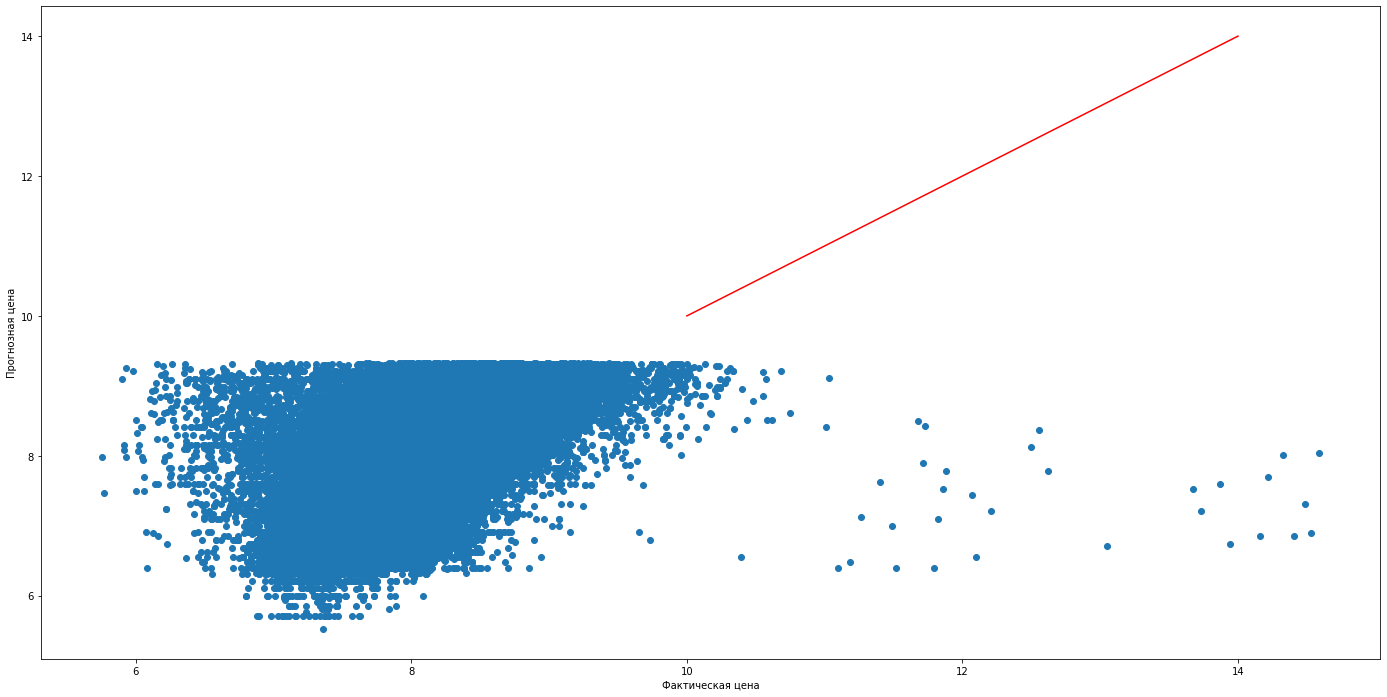

In [ ]:
def find_prediction_at_instance_for_ols(X, params, instance):
    return sum([val*X[instance, i].sum() for i, val in enumerate(params[:-1])])

fig, _ = plt.subplots(figsize=(24,12))
# fig.set_size_inches(18.5, 10.5)
plt.scatter(
    [find_prediction_at_instance_for_ols(X, res.params, i) for i in range(X.shape[0])],
    np.log(df.Цена))
plt.plot(list(range(10, 15)),list(range(10, 15)), c = 'red')
plt.xlabel('Фактическая цена')
plt.ylabel('Прогнозная цена')
plt.show()

In [ ]:
prediction = pd.DataFrame()
prediction['pred'] = res.predict(X)
prediction['fact'] = y
prediction['abs'] = abs(prediction['fact'] - prediction['pred'])
print(f'R^2: {res.rsquared_adj}')

R^2: 0.4584638995312629


OLS score = 0.45851759068153497


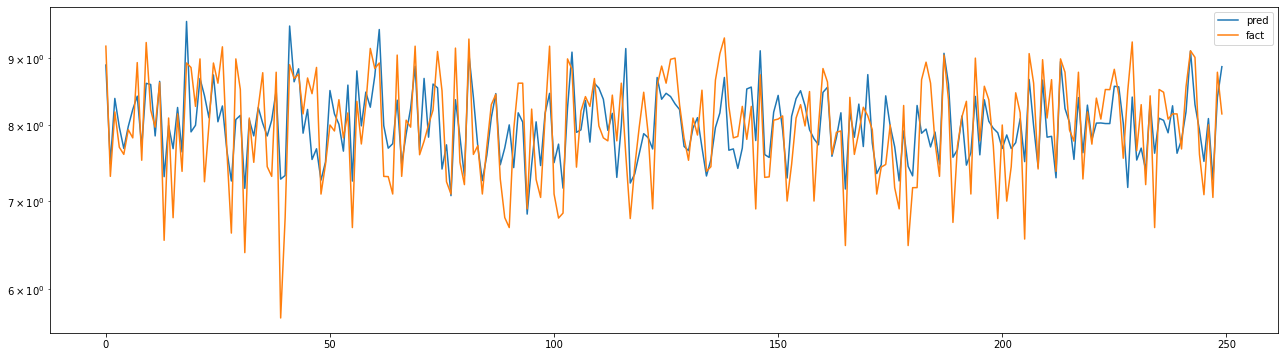

In [ ]:
from sklearn.metrics import r2_score

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(22,6))

plt.plot(range(250), prediction['pred'][:250], label = 'pred')
plt.plot(range(250), prediction['fact'][:250], label = 'fact')

plt.yscale('log')
plt.legend()
print(f'OLS score = {r2_score(y, res.predict(X))}')

In [ ]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.linear_model import LassoCV, RidgeCV


lasso = Lasso(random_state = 1)
lasso.fit(X, y)

ridge = Ridge(random_state = 1)
ridge.fit(X, y )

Ridge(random_state=1)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor()
rf_reg.fit(X, y)
y_pred_lin= rf_reg.predict(X)

Lasso score = 0.019186811371454393
Ridge score = 0.45850964595672794
Random forest score = 0.9284996487336353


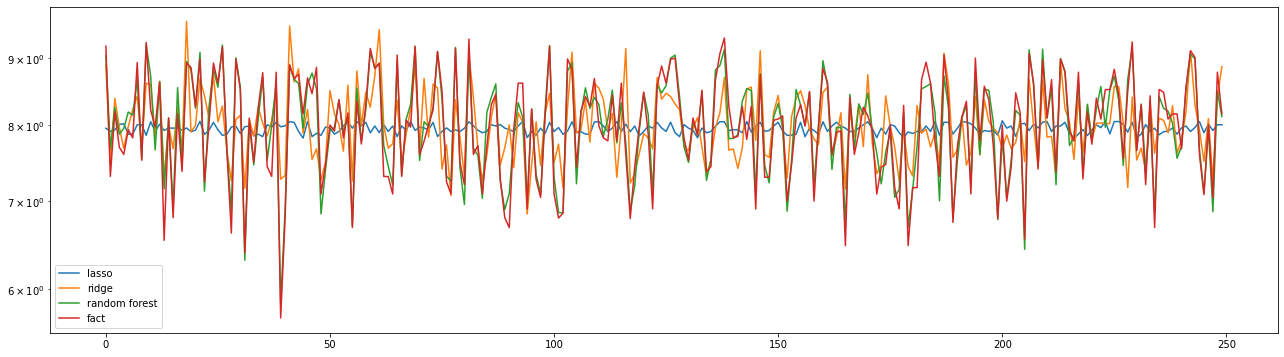

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(22,6))

plt.plot(range(250), lasso.predict(X[:250, ]), label = 'lasso')
plt.plot(range(250), ridge.predict(X[:250, ]), label = 'ridge')
plt.plot(range(250), y_pred_lin[:250], label = 'random forest')
plt.plot(range(250), y[:250, ], label = 'fact')
plt.yscale('log')
plt.legend()
print(f'Lasso score = {r2_score(y, lasso.predict(X))}')
print(f'Ridge score = {r2_score(y, ridge.predict(X))}')
print(f"Random forest score = {r2_score(y, y_pred_lin)}")

In [ ]:
X = df[['Стд Пробег']].values
y = df['Цена'].values

In [ ]:
from sklearn.linear_model import LinearRegression
slr = LinearRegression()
slr.fit(X, y)
y_pred = slr.predict(X)
print('Slope: {:.2f}'.format(slr.coef_[0]))
print('Intercept: {:.2f}'.format(slr.intercept_))

Slope: -363.78
Intercept: 3618.25


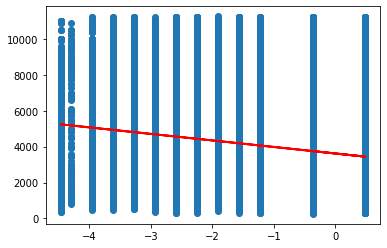

In [ ]:
plt.scatter(X, y)
plt.plot(X, slr.predict(X), color='red', linewidth=2);


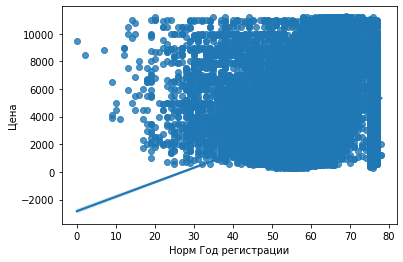

In [ ]:
sns.regplot(x="Норм Год регистрации", y="Цена", data=df)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

Разделим данные на обучающую и тестовую выборки. Для простоты не будем выделять дополнительно валидационную выборку. Дополнительно нам придется отделить значения целевой переменной от данных.

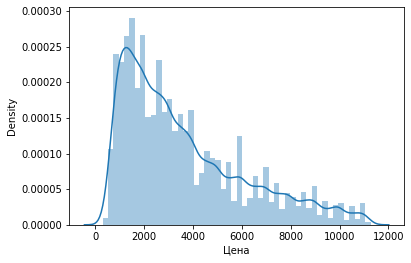

In [ ]:
from sklearn.model_selection import train_test_split

y = df["Цена"]
X = df.drop(columns=["Цена"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)
sns.distplot(y_train)

Так как для решения нашей задачи мы бы хотели обучить линейную регрессию, было бы хорошо найти признаки, «наиболее линейно» связанные с целевой переменной, иначе говоря, посмотреть на коэффициент корреляции Пирсона между признаками и целевой переменной.

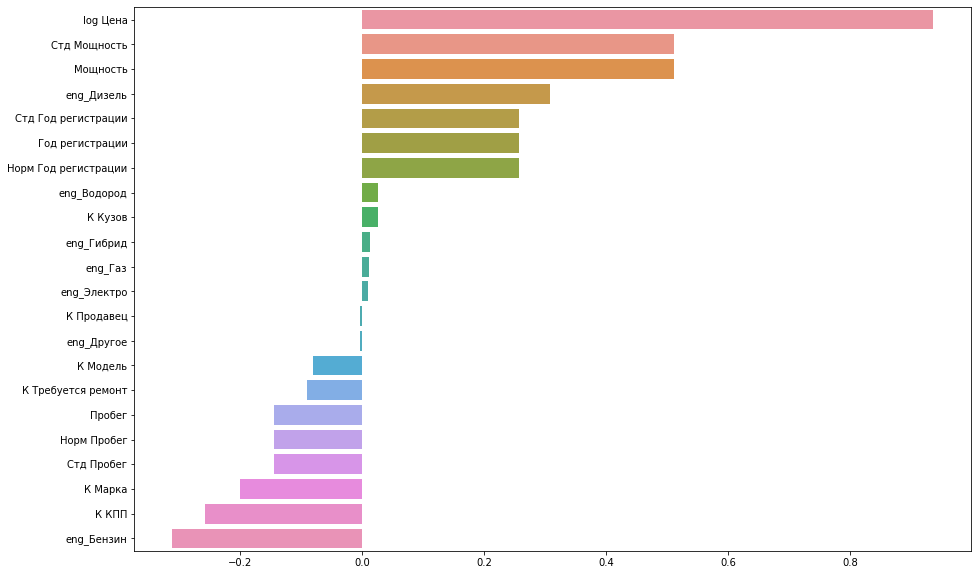

In [ ]:
numeric_data = X_train.select_dtypes([np.number])
numeric_data_mean = numeric_data.mean()
numeric_features = numeric_data.columns

X_train = X_train.fillna(numeric_data_mean)
X_test = X_test.fillna(numeric_data_mean)

correlations = {
    feature: np.corrcoef(X_train[feature], y_train)[0][1]
    for feature in numeric_features
}
sorted_correlations = sorted(correlations.items(), key=lambda x: x[1], reverse=True)
features_order = [x[0] for x in sorted_correlations]
correlations = [x[1] for x in sorted_correlations]

plot = sns.barplot(y=features_order, x=correlations)
plot.figure.set_size_inches(15, 10)

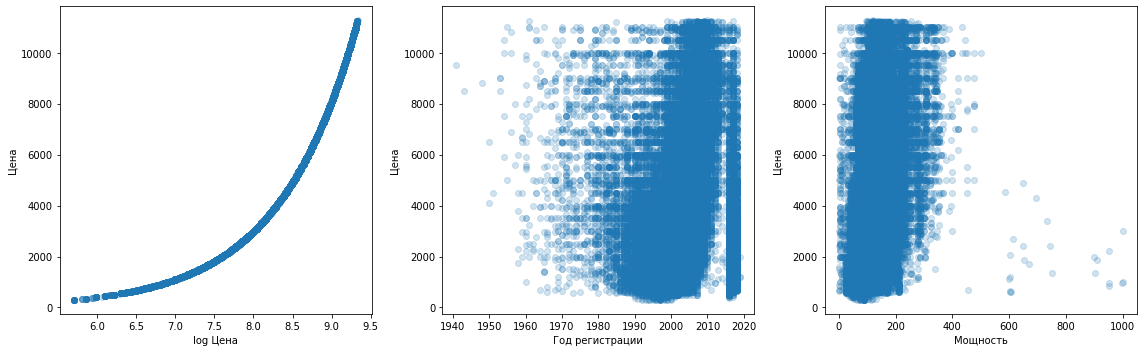

In [ ]:
fig, axs = plt.subplots(figsize=(16, 5), ncols=3)
for i, feature in enumerate(["log Цена", "Год регистрации", "Мощность"]):
    axs[i].scatter(X_train[feature], y_train, alpha=0.2)
    axs[i].set_xlabel(feature)
    axs[i].set_ylabel("Цена")
plt.tight_layout()

Первая модель

Попробуем обучить линейную регрессию на числовых признаках из нашего датасета. В sklearn есть несколько классов, реализующих линейную регрессию

У моделей из sklearn есть методы fit и predict. Первый принимает на вход обучающую выборку и вектор целевых переменных и обучает модель, второй, будучи вызванным после обучения модели, возвращает предсказание на выборке.

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

model = Ridge()
model.fit(X_train[numeric_features], y_train)
y_pred = model.predict(X_test[numeric_features])
y_train_pred = model.predict(X_train[numeric_features])

print("Test MSE = %.4f" % mean_squared_error(y_test, y_pred))
print("Train MSE = %.4f" % mean_squared_error(y_train, y_train_pred))

Test MSE = 732244.3593
Train MSE = 731869.8233


При кросс-валидации мы делим обучающую выборку на n частей (fold). Затем мы обучаем n моделей: каждая модель обучается при отсутствии соответствующего фолда, то есть i-ая модель обучается на всей обучающей выборке, кроме объектов, которые попали в i-ый фолд (out-of-fold). Затем мы измеряем качество i-ой модели на i-ом фолде. Так как он не участвовал в обучении этой модели, мы получим «честный результат». После этого, для получения финального значения метрики качества, мы можем усреднить полученные нами n значений.

In [ ]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model, X_train[numeric_features], y_train, cv=10, scoring="neg_mean_squared_error")
print("Cross validation scores:\n\t", "\n\t".join("%.4f" % x for x in cv_scores))
print("Mean CV MSE = %.4f" % np.mean(-cv_scores))

Cross validation scores:
	 -724026.3629
	-725133.8230
	-735090.0913
	-741565.3209
	-740860.9276
	-745629.1821
	-718474.2476
	-722638.2172
	-726765.9290
	-740639.7268
Mean CV MSE = 732082.3828


RMSE ( Root Mean Squared Error)

In [ ]:
from sklearn.metrics import make_scorer

def rmse(y_true, y_pred):
    error = (y_true - y_pred) ** 2
    return np.sqrt(np.mean(error))

rmse_scorer = make_scorer(
    rmse,
    greater_is_better=False
)

In [ ]:
from sklearn.linear_model import Ridge

model = Ridge()
model.fit(X_train[numeric_features], y_train)
y_pred = model.predict(X_test[numeric_features])
y_train_pred = model.predict(X_train[numeric_features])

print("Test RMSE = %.4f" % rmse(y_test, y_pred))
print("Train RMSE = %.4f" % rmse(y_train, y_train_pred))

Test RMSE = 855.7128
Train RMSE = 855.4939


In [ ]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model, X_train[numeric_features], y_train, cv=10, scoring=rmse_scorer)
print("Cross validation scores:\n\t", "\n\t".join("%.4f" % x for x in cv_scores))
print("Mean CV RMSE = %.4f" % np.mean(-cv_scores))

Cross validation scores:
	 -850.8974
	-851.5479
	-857.3740
	-861.1419
	-860.7328
	-863.4982
	-847.6286
	-850.0813
	-852.5057
	-860.6043
Mean CV RMSE = 855.6012


In [ ]:
#Для того, чтобы иметь некоторую точку отсчета, удобно посчитать оптимальное значение функции потерь при константном предсказании.

best_constant = y_train.mean()
print("Test RMSE with best constant = %.4f" % rmse(y_test, best_constant))
print("Train RMSE with best constant = %.4f" % rmse(y_train, best_constant))

Test RMSE with best constant = 2499.1035
Train RMSE with best constant = 2512.8504


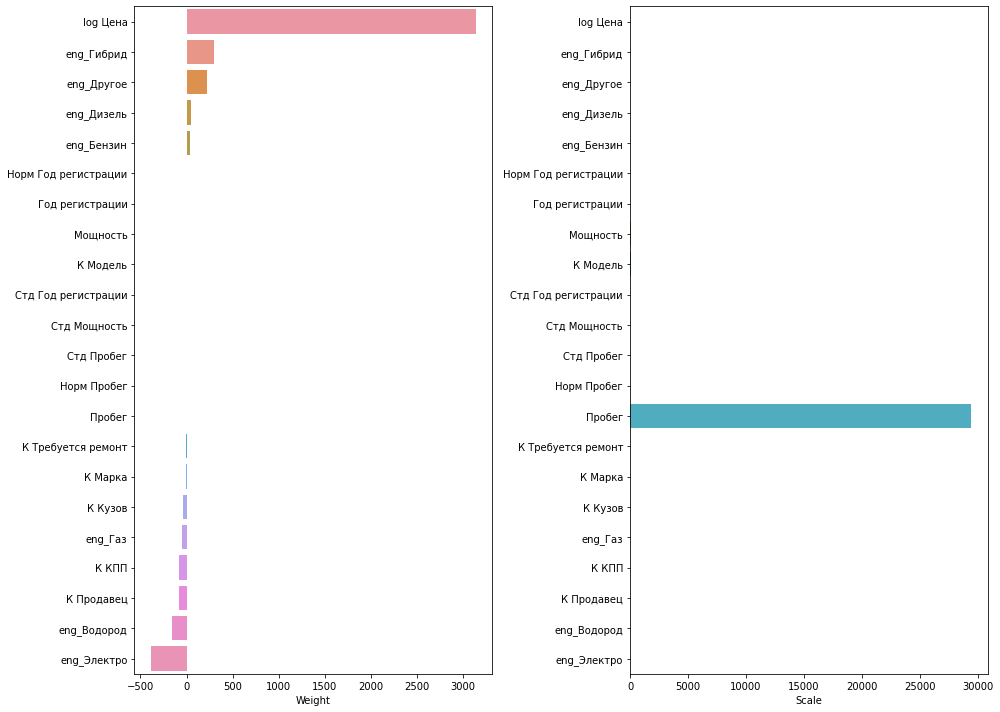

In [ ]:
# Посмотрим на то, какие же признаки оказались самыми «сильными». Для этого визуализируем веса, соответствующие признакам. Чем больше вес — тем более сильным является признак.

def show_weights(features, weights, scales):
    fig, axs = plt.subplots(figsize=(14, 10), ncols=2)
    sorted_weights = sorted(zip(weights, features, scales), reverse=True)
    weights = [x[0] for x in sorted_weights]
    features = [x[1] for x in sorted_weights]
    scales = [x[2] for x in sorted_weights]
    sns.barplot(y=features, x=weights, ax=axs[0])
    axs[0].set_xlabel("Weight")
    sns.barplot(y=features, x=scales, ax=axs[1])
    axs[1].set_xlabel("Scale")
    plt.tight_layout()
show_weights(numeric_features, model.coef_, X_train[numeric_features].std())

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[numeric_features])
X_test_scaled = scaler.transform(X_test[numeric_features])

model = Ridge()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
y_train_pred = model.predict(X_train_scaled)

print("Test RMSE = %.4f" % rmse(y_test, y_pred))
print("Train RMSE = %.4f" % rmse(y_train, y_train_pred))

Test RMSE = 855.7122
Train RMSE = 855.4938


Масштабируем наши признаки перед обучением модели. Это сделает нашу регуляризацию более честной: теперь все признаки будут регуляризоваться в равной степени.

Test RMSE = 855.7122


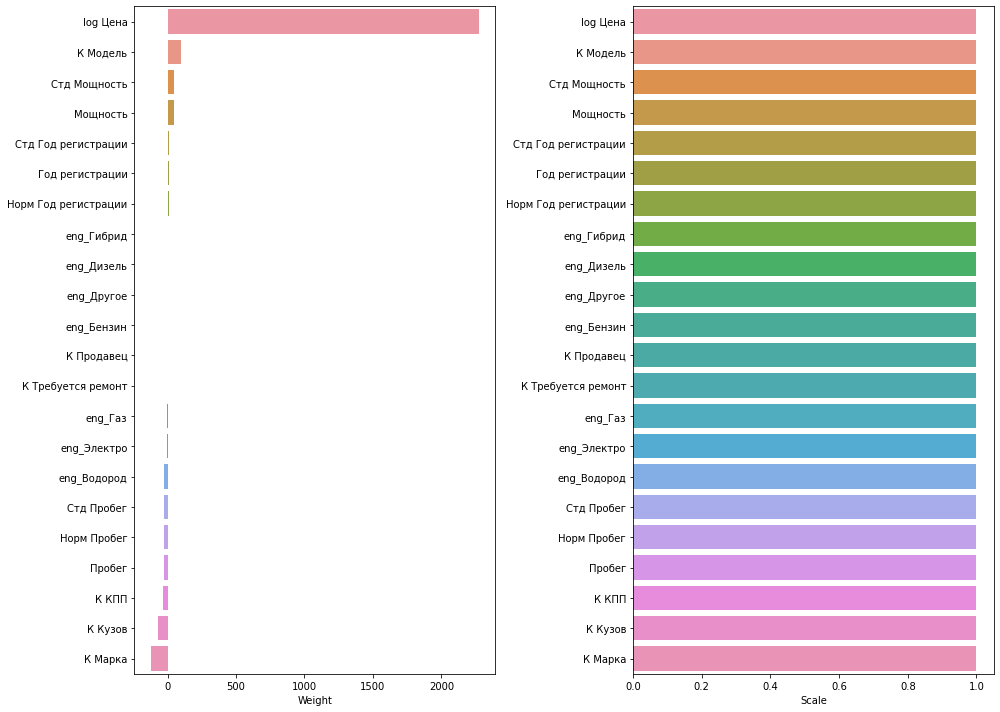

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[numeric_features])
X_test_scaled = scaler.transform(X_test[numeric_features])

model = Ridge()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
y_train_pred = model.predict(X_train_scaled)

print("Test RMSE = %.4f" % rmse(y_test, y_pred))
scales = pd.Series(data=X_train_scaled.std(axis=0), index=numeric_features)
show_weights(numeric_features, model.coef_, scales)

Best alpha = 0.0100


Text(0, 0.5, 'CV score')

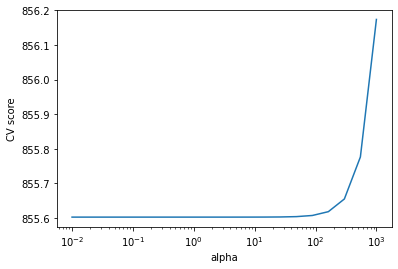

In [ ]:
#перебираем alpha по логарифмической сетке, чтобы узнать оптимальный порядок величины
from sklearn.model_selection import GridSearchCV

alphas = np.logspace(-2, 3, 20)
searcher = GridSearchCV(Ridge(), [{"alpha": alphas}], scoring=rmse_scorer, cv=10)
searcher.fit(X_train_scaled, y_train)

best_alpha = searcher.best_params_["alpha"]
print("Best alpha = %.4f" % best_alpha)

plt.plot(alphas, -searcher.cv_results_["mean_test_score"])
plt.xscale("log")
plt.xlabel("alpha")
plt.ylabel("CV score")

In [ ]:
#Попробуем обучить модель с подобранным коэффициентом регуляризации.
from sklearn.pipeline import Pipeline

simple_pipeline = Pipeline([
    ('scaling', StandardScaler()),
    ('regression', Ridge(best_alpha))
])

model = simple_pipeline.fit(X_train[numeric_features], y_train)
y_pred = model.predict(X_test[numeric_features])
print("Test RMSE = %.4f" % rmse(y_test, y_pred))


Test RMSE = 855.7124


In [ ]:
categorical = list(X_train.dtypes[X_train.dtypes == "object"].index)
X_train[categorical].sample(5)

""
138612
86653
39361
149053
107655


Сейчас нам нужно как-то закодировать эти категориальные признаки числами, ведь линейная модель не может работать с такими абстракциями. Два стандартных трансформера из sklearn для работы с категориальными признаками LabelEncoder и OneHotEncoder, с ними мучались ранее, тут не задерживаемся

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
    ('scaling', StandardScaler(), numeric_features)
])

pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge())
])

model = pipeline.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Test RMSE = %.4f" % rmse(y_test, y_pred))

Test RMSE = 855.7122


In [ ]:
#Размеры матрицы после OneHot-кодирования:
print("Size before OneHot:", X_train.shape)
print("Size after OneHot:", column_transformer.transform(X_train).shape)

Size before OneHot: (105905, 22)
Size after OneHot: (105905, 22)



Попытаемся обучить линейную регрессию с ℓ1-регуляризатором.

 ℓ1-регуляризатор разреживает признаковое пространство, иными словами, такая модель зануляет часть весов.

In [ ]:
from sklearn.linear_model import Lasso

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
    ('scaling', StandardScaler(), numeric_features)
])

lasso_pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Lasso())
])

model = lasso_pipeline.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("RMSE = %.4f" % rmse(y_test, y_pred))
ridge_zeros = np.sum(pipeline.steps[-1][-1].coef_ == 0)
lasso_zeros = np.sum(lasso_pipeline.steps[-1][-1].coef_ == 0)
print("Zero weights in Ridge:", ridge_zeros)
print("Zero weights in Lasso:", lasso_zeros)

RMSE = 855.6947
Zero weights in Ridge: 0
Zero weights in Lasso: 6


In [ ]:
alphas = np.logspace(-2, 4, 20)
searcher = GridSearchCV(lasso_pipeline, [{"regression__alpha": alphas}], scoring=rmse_scorer, cv=10)
searcher.fit(X_train, y_train)

best_alpha = searcher.best_params_["regression__alpha"]
print("Best alpha = %.4f" % best_alpha)

Best alpha = 0.0886


Text(0, 0.5, 'CV score')

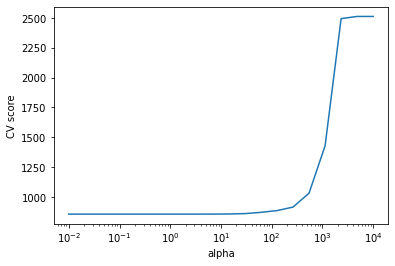

In [ ]:
plt.plot(alphas, -searcher.cv_results_["mean_test_score"])
plt.xscale("log")
plt.xlabel("alpha")
plt.ylabel("CV score")

In [ ]:
column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
    ('scaling', StandardScaler(), numeric_features)
])

pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Lasso(best_alpha))
])

model = pipeline.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Test RMSE = %.4f" % rmse(y_test, y_pred))

Test RMSE = 855.7099


In [ ]:
lasso_zeros = np.sum(pipeline.steps[-1][-1].coef_ == 0)
print("Zero weights in Lasso:", lasso_zeros)

Zero weights in Lasso: 1


Нарисуем гистограмму распределения квадратичной ошибки на обучающих объектах:

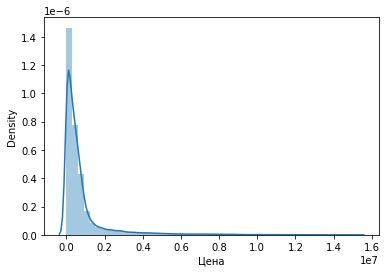

In [ ]:
error = (y_train - model.predict(X_train)) ** 2
sns.distplot(error)

Как видно из гистограммы, есть примеры с очень большими остатками. Попробуем их выбросить из обучающей выборки. Например, выбросим примеры, остаток у которых больше 0.95-квантили.

In [ ]:
mask = (error < np.quantile(error, 0.95))

In [ ]:
column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
    ('scaling', StandardScaler(), numeric_features)
])

pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Lasso(best_alpha))
])

model = pipeline.fit(X_train[mask], y_train[mask])
y_pred = model.predict(X_test)
print("Test RMSE = %.4f" % rmse(y_test, y_pred))

Test RMSE = 873.4884


In [ ]:
X_train = X_train[mask]
y_train = y_train[mask]

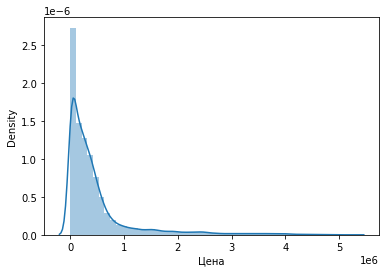

In [ ]:
error = (y_train - model.predict(X_train)) ** 2
sns.distplot(error)

# Пробуем увеличить результат с помощью подбора scaler и методов машинного обучения

In [ ]:
df = pd.read_csv('/content/auto_v01.csv', index_col = 'Unnamed: 0')
df.head()

,Цена,Год регистрации,Мощность,Пробег,log Цена,К КПП,К Кузов,Норм Год регистрации,К Продавец,eng_Бензин,...,eng_Дизель,eng_Другое,eng_Электро,К Требуется ремонт,К Марка,К Модель,Норм Пробег,Стд Мощность,Стд Год регистрации,Стд Пробег
0,9800.0,2004.0,163.0,125000.0,9.190138,0,2,63.0,1,0,...,1,0,0,0,14,103,25.0,0.926060,0.221636,-0.370293
1,1500.0,2001.0,75.0,150000.0,7.313220,1,4,60.0,1,1,...,0,0,0,0,37,102,30.0,-0.829678,-0.264574,0.483153
2,3600.0,2008.0,69.0,90000.0,8.188689,1,4,67.0,1,0,...,1,0,0,0,30,89,18.0,-0.949388,0.869917,-1.565118
3,2200.0,2004.0,109.0,150000.0,7.696213,1,1,63.0,1,1,...,0,0,0,0,25,7,30.0,-0.151325,0.221636,0.483153
4,2000.0,2004.0,105.0,150000.0,7.600902,1,6,63.0,1,1,...,0,0,0,0,19,9,30.0,-0.231131,0.221636,0.483153


In [ ]:
df.fillna('error', inplace = True)

In [ ]:
def encode_categorial(name_scaler, scaler, data, y = None, return_scaler = False):
    if name_scaler != 'TargetEncoder':
        if not return_scaler:
            return data[categorical_cols].apply(lambda x: scaler.fit_transform(x.astype(str)))
        else:
            return data[categorical_cols].apply(lambda x: scaler.fit_transform(x.astype(str))), scaler
    else:
        if not return_scaler:
            return scaler.fit_transform(data[categorical_cols], y)
        else:
            return scaler.fit_transform(data[categorical_cols], y), scaler

def encode_number(name_scaler, scaler, data, return_scaler = False):
    if name_scaler == 'Not scaled':
        if not return_scaler:
            return data
        else:
            return data, scaler
    else:
        if not return_scaler:
            return scaler.fit_transform(data)
        else:
            return scaler.fit_transform(data), scaler

Цикл из нескольких моделей машинного обучения для предсказания цен

In [ ]:
from category_encoders.target_encoder import TargetEncoder
scalers_categorial = {'LabelEncoder': LabelEncoder(),
                     'TargetEncoder': TargetEncoder()}

mls = {
        'GradientBoostingRegressor': GradientBoostingRegressor(random_state=0),
        'linear': LinearRegression(), 'RandomForestRegressor':RandomForestRegressor(max_depth=2, random_state=0),
        'LassoCV': LassoCV(), 'Ridge': RidgeCV(), 'ElasticNetCV': ElasticNetCV(),
       'ExtraTreesRegressor': ExtraTreesRegressor(n_estimators=100, random_state=0)
        }

scalers = {'StandardScaler': StandardScaler(), 'MinMaxScaler': MinMaxScaler(),
           'RobustScaler': RobustScaler(), 'Normalizer': Normalizer(), 'Not scaled': 0}

mlss = []

X = df.drop(['Цена'], axis = 1)
y = df['Цена']

numbers_cols, categorical_cols = get_cols(X)

for idd, (name_ml, ml) in enumerate(mls.items()):
    data = pd.DataFrame()
    for ide, (name_scaler_categorial, scaler_categorial) in enumerate(scalers_categorial.items()):
        data[categorical_cols] = encode_categorial(name_scaler_categorial, scaler_categorial, X[categorical_cols], y)

        for name_scaler, scaler in scalers.items():
            for name in numbers_cols:
                data[name] = 0

            data[numbers_cols] = encode_number(name_scaler, scaler, X[numbers_cols])


            X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.33, random_state=42, shuffle = True)

            model = ml.fit(X_train, y_train)

            #mlss[name+ ' '+ str(ide)] = {'categorial encoding': i,'number encoding': name_scaler,
            #                            'score': round(model.score(X_test, y_test),3)}
            mlss.append([name_ml, name_scaler_categorial, name_scaler, round(model.score(X_test, y_test),3)])

In [ ]:
sorted(mlss, key = lambda x: x[3], reverse = True)

[['GradientBoostingRegressor', 'LabelEncoder', 'StandardScaler', 1.0],
 ['GradientBoostingRegressor', 'LabelEncoder', 'MinMaxScaler', 1.0],
 ['GradientBoostingRegressor', 'LabelEncoder', 'RobustScaler', 1.0],
 ['GradientBoostingRegressor', 'LabelEncoder', 'Not scaled', 1.0],
 ['GradientBoostingRegressor', 'TargetEncoder', 'StandardScaler', 1.0],
 ['GradientBoostingRegressor', 'TargetEncoder', 'MinMaxScaler', 1.0],
 ['GradientBoostingRegressor', 'TargetEncoder', 'RobustScaler', 1.0],
 ['GradientBoostingRegressor', 'TargetEncoder', 'Not scaled', 1.0],
 ['ExtraTreesRegressor', 'LabelEncoder', 'StandardScaler', 1.0],
 ['ExtraTreesRegressor', 'LabelEncoder', 'MinMaxScaler', 1.0],
 ['ExtraTreesRegressor', 'LabelEncoder', 'RobustScaler', 1.0],
 ['ExtraTreesRegressor', 'LabelEncoder', 'Not scaled', 1.0],
 ['ExtraTreesRegressor', 'TargetEncoder', 'StandardScaler', 1.0],
 ['ExtraTreesRegressor', 'TargetEncoder', 'MinMaxScaler', 1.0],
 ['ExtraTreesRegressor', 'TargetEncoder', 'RobustScaler', 1.0]

Как мы можем заметить нам лучше всего использовать ExtraTreesRegressor c target ##кодированием категориальных и 'StandardScaler' числовых переменных

12.	Настроить гипперпараметры для лучшего алгоритма.

In [ ]:
data = df.copy()

numbers_cols, categorical_cols = get_cols(df.drop(['Цена'], axis = 1))

data[categorical_cols], scaler_categorial = encode_categorial('TargetEncoder', TargetEncoder(), data[categorical_cols], y, return_scaler = True)
data[numbers_cols], scaler_number = encode_number('StandardScaler', Normalizer(), data[numbers_cols], return_scaler = True)

X = data.drop(['Цена'], axis = 1)
y = np.log(data['Цена'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, shuffle = True)

model = ExtraTreesRegressor(n_estimators=100, random_state=0).fit(X_train, y_train)
model_boost = GradientBoostingRegressor(random_state=0).fit(X_train, y_train)

y_ExtraTrees = model.predict(X)

ExtraTrees score = 0.9990825031738185
GradientBoostingRegressor score = 0.8963971227740907


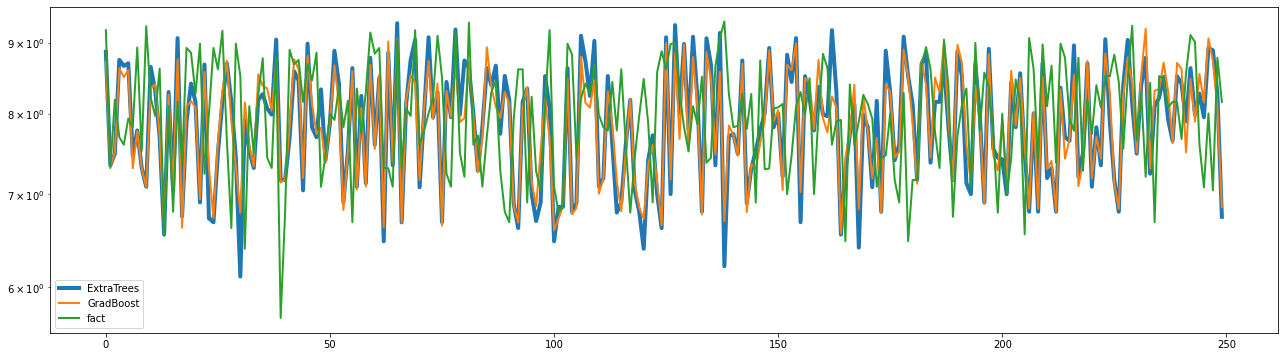

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(22,6))

x = X.sample(250)
plt.plot(range(250), model.predict(x), label = 'ExtraTrees', linewidth=4.0)
plt.plot(range(250), model_boost.predict(x), label = 'GradBoost', linewidth=2.0)
plt.plot(range(250), y.iloc[:250, ], label = 'fact', linewidth=2.0)

plt.yscale('log')
plt.legend()
print(f'ExtraTrees score = {r2_score(y, model.predict(X))}')
print(f'GradientBoostingRegressor score = {r2_score(y, model_boost.predict(X))}')

13.	Решить задачу регрессии, используя методы глубокого обучения (нейронные сети).

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
col = ('log Цена', 'К Продавец', 'eng_Бензин', 'eng_Водород',
       'eng_Газ', 'eng_Гибрид', 'eng_Дизель', 'eng_Другое', 'eng_Электро',
       'К Требуется ремонт', 'К Марка', 'К Модель', 'К КПП', 'К Кузов', 'Стд Мощность',
       'Стд Год регистрации', 'Стд Пробег')
data = pd.DataFrame()
data = df[[i for i in col]].copy()
X = data.drop('log Цена', axis=1).values
y = data['log Цена'].values

In [ ]:
model = Sequential()
model.add(Dense(61, input_dim=X.shape[1], activation='relu'))
model.add(Dense(61, activation='relu'))
model.add(Dense(1, activation='relu'))

In [ ]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['MeanSquaredError'])

In [ ]:
model.fit(X, y, epochs=7)

Epoch 1/7
4728/4728 [==============================] - 10s 2ms/step - loss: 0.8447 - mean_squared_error: 0.8447
Epoch 2/7
4728/4728 [==============================] - 8s 2ms/step - loss: 0.2518 - mean_squared_error: 0.2518
Epoch 3/7
4728/4728 [==============================] - 8s 2ms/step - loss: 0.2052 - mean_squared_error: 0.2052
Epoch 4/7
4728/4728 [==============================] - 8s 2ms/step - loss: 0.1827 - mean_squared_error: 0.1827
Epoch 5/7
4728/4728 [==============================] - 8s 2ms/step - loss: 0.1720 - mean_squared_error: 0.1720
Epoch 6/7
4728/4728 [==============================] - 8s 2ms/step - loss: 0.1615 - mean_squared_error: 0.1615
Epoch 7/7
4728/4728 [==============================] - 8s 2ms/step - loss: 0.1515 - mean_squared_error: 0.1515


In [ ]:
p=model.predict(X)

In [ ]:
print(f'Neuro score: {r2_score(y, p)}')

Neuro score: 0.7355859676597156


14.	Сравнить полученные результаты.

In [ ]:
fin = pd.DataFrame()

fin['price_log'] = y
fin['extraTrees reg'] = y_ExtraTrees
fin["neuron"] = p

fin[["price_log","extraTrees reg","neuron"]]

,price_log,extraTrees reg,neuron
0,9.190138,9.166448,9.143229
1,7.313220,7.313220,7.610850
2,8.188689,8.188689,8.390297
3,7.696213,7.696213,7.824730
4,7.600902,7.600582,7.719885
...,...,...,...
151288,7.306531,7.308829,7.074827
151289,8.293800,8.284474,7.734804
151290,8.565983,8.549393,8.592339
151291,9.126959,9.126959,8.400642


In [ ]:
print(f'extraTrees Регрессия: {r2_score(fin["price_log"], fin["extraTrees reg"])}')
print(f'Нейронная сеть: {r2_score(fin["price_log"], fin["neuron"])}')

extraTrees Регрессия: 0.9990200131892535
Нейронная сеть: 0.7355859676597156


15.	Построить графики реальных и предсказанных данных.

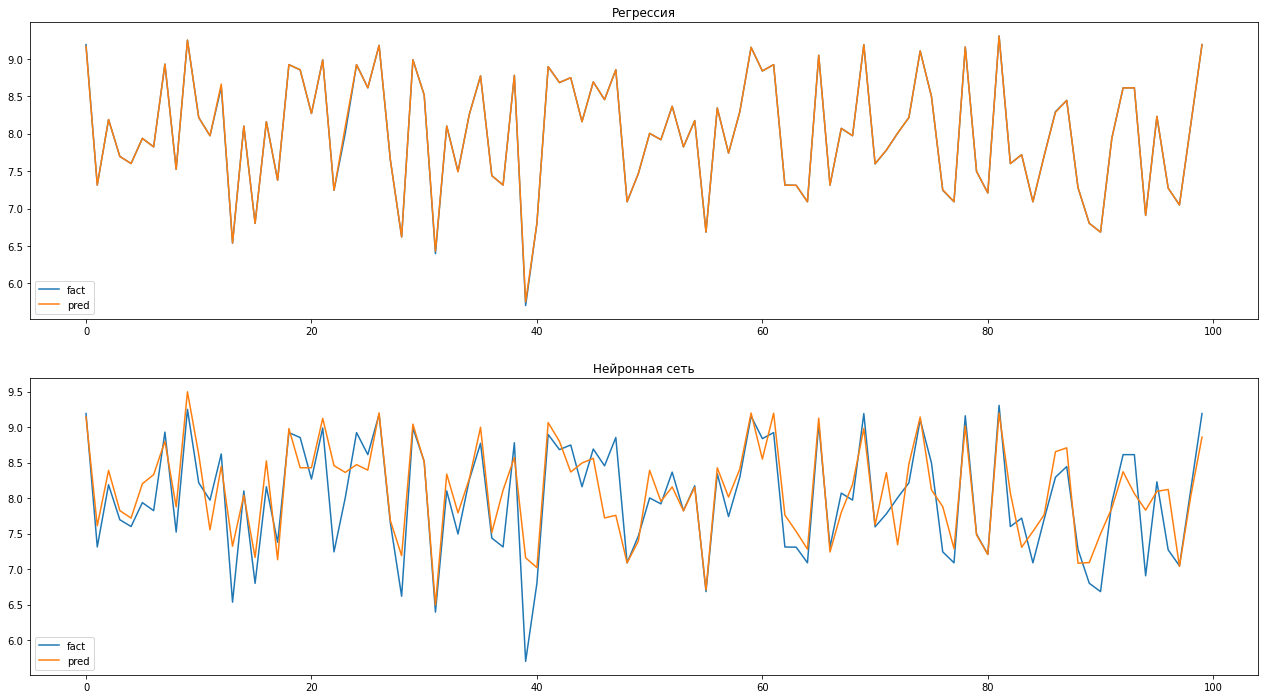

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(22,12))

ax[0].plot(range(100), fin['price_log'][:100], label = 'fact')
ax[0].plot(range(100), fin['extraTrees reg'][:100], label = 'pred')
ax[0].set_title('Регрессия')
ax[0].legend()

ax[1].plot(range(100), fin['price_log'][:100], label = 'fact')
ax[1].plot(range(100), fin['neuron'][:100], label = 'pred')
ax[1].set_title('Нейронная сеть')
ax[1].legend()

In [ ]:
import joblib

joblib.dump((rf_reg, model), 'car_models.joblib')

['car_models.joblib']

16.	Спроектировать онлайн систему предсказания цены автомобиля от наиболее важных параметров (по датасету).

In [ ]:
le_saler, le_eng, encode_binary, le_marka, le_model, le_kuz, le_kpp, std_god, std_probeg, std_mosh = joblib.load('carsX.joblib')
model, _ = joblib.load('car_models.joblib')

In [ ]:
def pred(saler, kuz, god, kpp, mosh, car_model, probeg, dvig, marka, remont):
  df=pd.DataFrame(data={"КПП":[kpp],"Тип кузова":[kuz],"Марка":[marka],"Модель":[car_model],"Тип двигателя":[dvig],"Требуется ремонт":[remont],"Мощность":[mosh],"Год":[god],"Пробег":[probeg]})
  df["К КПП"]=le_kpp.transform(df["КПП"])
  df["К Кузов"]=le_kuz.transform(df["Тип кузова"])
  df["К Марка"]=le_marka.transform(df["Марка"])
  df["К Модель"]=le_model.transform(df["Модель"])
  df["К Требуется ремонт"]=encode_binary(df["Требуется ремонт"])
  df["Стд Мощность"]=std_mosh.transform(df[["Мощность"]])
  df["Норм Год"]=df["Год"]-1940
  df["Норм Пробег"]=df["Пробег"]/5000
  df["Стд Год"]=std_god.transform(df[["Норм Год"]])
  df["Стд Пробег"]=std_probeg.transform(df[["Норм Пробег"]])
  df = pd.concat([df, le_eng.transform(df['Тип двигателя'][0])], axis=1)
  X = df.drop(["КПП", "Тип кузова", "Марка", "Модель", "Тип двигателя","Требуется ремонт","Мощность","Пробег","Норм Год", "Норм Пробег"],
              axis=1)
  pred = model.predict(X.values)

  return np.exp(pred)[0]

pred('Частное лицо', 'Кроссовер', 2022, 'АКПП', 163, 'Grand Cherokee', 125000, 'Дизель', 'Jeep', 'Нет')

4103.490068130265

In [ ]:
import ipywidgets as widgets

In [ ]:
marka=widgets.Dropdown(
    options=le_marka.classes_,
    value=le_marka.classes_[0],
    description='Марка:',
    disabled=False,
)
car_model=widgets.Dropdown(
    options=le_model.classes_,
    value=le_model.classes_[0],
    description='Модель:',
    disabled=False,
)
kpp=widgets.Dropdown(
    options=le_kpp.classes_,
    value=le_kpp.classes_[0],
    description='КПП:',
    disabled=False,
)
dvig=widgets.Dropdown(
    options=le_eng.types,
    value=le_eng.types[0],
    description='Двигатель:',
    disabled=False,
)
kuz=widgets.Dropdown(
    options=le_kuz.classes_,
    value=le_kuz.classes_[2],
    description='Тип кузова:',
    disabled=False,
)
remont=widgets.Dropdown(
    options=['Да', 'Нет'],
    value='Нет',
    description='Нужен ремонт:',
    disabled=False,
)
god=widgets.BoundedIntText(
    value=2022,
    min=1900,
    max=2100,
    step=1,
    description='Год:',
    disabled=False
)
mosh=widgets.BoundedIntText(
    value=100,
    min=0,
    max=1000,
    step=1,
    description='Мощность:',
    disabled=False
)
probeg=widgets.BoundedIntText(
    value=50000,
    min=0,
    max=100000000,
    step=1,
    description='Пробег:',
    disabled=False
)
knopka=widgets.Button(description='Расчитать')
result = widgets.FloatText(
    value=1,
    description='Цена',
    disabled=True
)
def kk(a):
  pp = pred(
      kuz.value, god.value, kpp.value, mosh.value, car_model.value,
      probeg.value, dvig.value, marka.value, remont.value)
  result.value = round(pp, 2)

knopka.on_click(kk)
m=[marka, car_model,kpp,kuz,dvig,remont,god,mosh,probeg,knopka, result]
widgets.VBox(children=m)